Correlation Visualization

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [71]:
df_vaccinations = pd.read_csv("./../Data/Final_Datasets/country_vaccinations.csv")
df_vaccinations["date"] = pd.to_datetime(df_vaccinations["date"], errors='coerce')
df_vaccinations

,Unnamed: 0.1,Unnamed: 0,iso_code,FIRST_VACCINE_DATE,days_since_first_vac,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,0,0,ABW,2021-02-17,40.0,Aruba,2021-03-29,25766.0,15600.0,10166.0,0.0,0.0,24.04,14.55,9.48,0.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
1,1,1,ABW,2021-02-17,41.0,Aruba,2021-03-30,27044.0,15600.0,10166.0,0.0,1278.0,24.04,14.55,9.48,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
2,2,2,ABW,2021-02-17,42.0,Aruba,2021-03-31,28322.0,15600.0,10166.0,0.0,1278.0,24.04,14.55,9.48,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
3,3,3,ABW,2021-02-17,43.0,Aruba,2021-04-01,29600.0,15600.0,10166.0,0.0,1278.0,24.04,14.55,9.48,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
4,4,4,ABW,2021-02-17,44.0,Aruba,2021-04-02,30878.0,15600.0,10166.0,0.0,1278.0,24.04,14.55,9.48,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82138,82138,82138,WSM,2021-04-18,333.0,Samoa,2022-03-17,298099.0,145989.0,130289.0,0.0,1022.0,138.04,72.94,65.10,5106.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
82139,82139,82139,WSM,2021-04-18,334.0,Samoa,2022-03-18,299121.0,145989.0,130289.0,0.0,1022.0,138.04,72.94,65.10,5106.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
82140,82140,82140,WSM,2021-04-18,335.0,Samoa,2022-03-19,300143.0,145989.0,130289.0,0.0,1022.0,138.04,72.94,65.10,5106.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
82141,82141,82141,WSM,2021-04-18,336.0,Samoa,2022-03-20,301165.0,145989.0,130289.0,0.0,1022.0,138.04,72.94,65.10,5106.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...


In [74]:
df_cases = pd.read_csv("./../Data/Final_Datasets/country_death_case.csv")
df_cases["Date_reported"] = pd.to_datetime(df_cases["Date_reported"], errors='coerce')
df_cases

,Unnamed: 0.1,Unnamed: 0,iso_code,FIRST_VACCINE_DATE,Date_reported,days_since_first_vac,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,0,0,ABW,2021-02-17,2020-01-04,-410.0,Aruba,AMR,0.0,0,0.0,0
1,1,1,ABW,2021-02-17,2020-01-05,-409.0,Aruba,AMR,0.0,0,0.0,0
2,2,2,ABW,2021-02-17,2020-01-06,-408.0,Aruba,AMR,0.0,0,0.0,0
3,3,3,ABW,2021-02-17,2020-01-07,-407.0,Aruba,AMR,0.0,0,0.0,0
4,4,4,ABW,2021-02-17,2020-01-08,-406.0,Aruba,AMR,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
356863,356863,356863,WSM,2021-04-18,2024-09-18,1249.0,Samoa,WPR,0.0,17057,0.0,31
356864,356864,356864,WSM,2021-04-18,2024-09-19,1250.0,Samoa,WPR,0.0,17057,0.0,31
356865,356865,356865,WSM,2021-04-18,2024-09-20,1251.0,Samoa,WPR,0.0,17057,0.0,31
356866,356866,356866,WSM,2021-04-18,2024-09-21,1252.0,Samoa,WPR,0.0,17057,0.0,31


In [75]:
df_US_cases = df_cases[df_cases["Country"] == "United States of America"]
# print("First Date")
# print(df_US_cases.iloc[0])
# print("Last Date")
df_US_vac = df_vaccinations[df_vaccinations["country"] == "United States"]
# print("First Date")
# print(df_US_vac.iloc[0])
# print("Last Date")

period_start = df_US_vac.iloc[0]["date"]
print(period_start)
period_end = df_US_vac.iloc[len(df_US_vac) - 1]["date"]
print(period_end)

# trim the cases to the dates of the vaccinations
df_US_cases_trimed = df_US_cases[df_US_cases["Date_reported"] <= period_end]
df_US_cases_trimed = df_US_cases_trimed[df_US_cases_trimed["Date_reported"] >= period_start]
# print(df_US_cases_trimed)

2020-12-13 00:00:00
2022-03-28 00:00:00


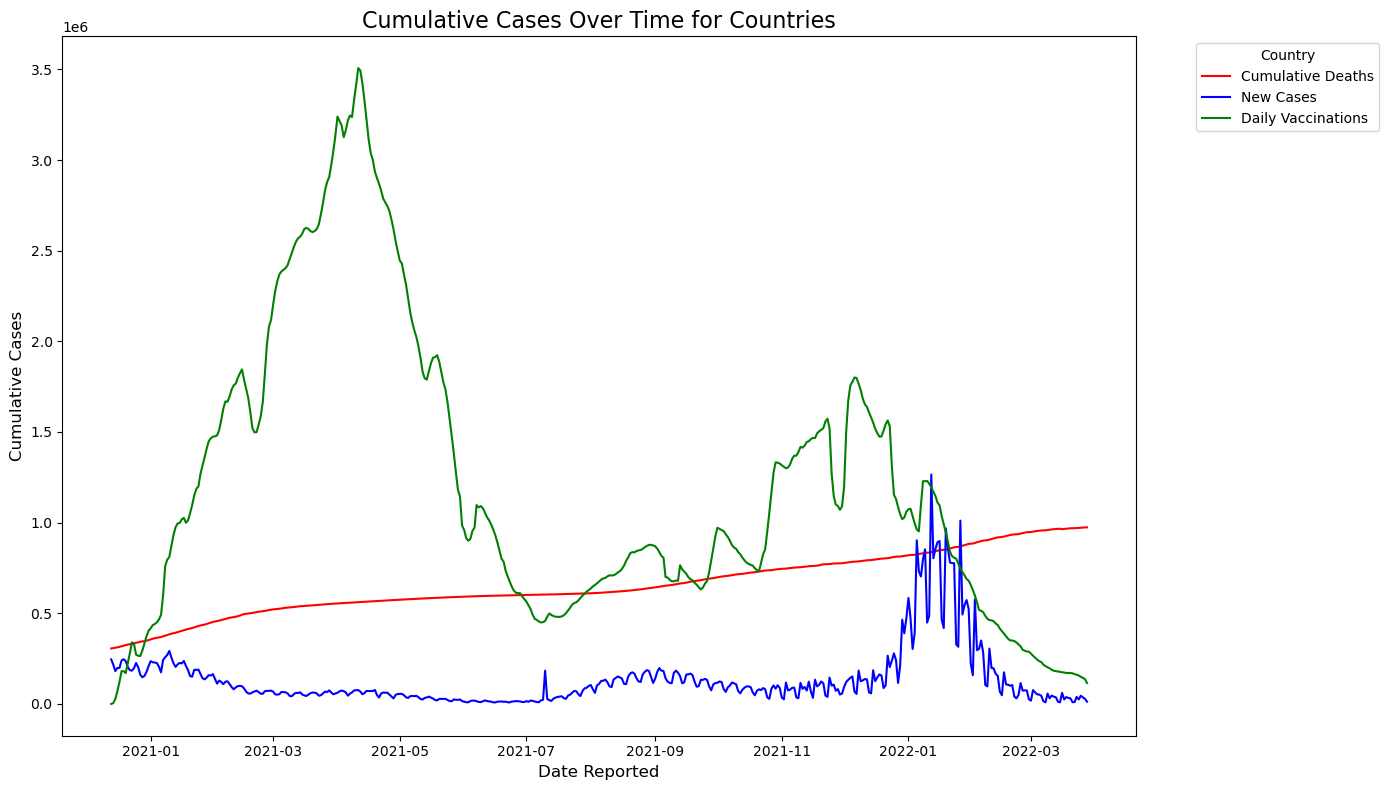

In [76]:
plt.figure(figsize=(14, 8))  

plt.plot(df_US_cases_trimed['Date_reported'], df_US_cases_trimed['New_cases'], label="New Cases", color="blue")
plt.plot(df_US_cases_trimed['Date_reported'], df_US_vac['daily_vaccinations'], label="Daily Vaccinations", color="green")

plt.title(f'Cumulative Cases Over Time for Countries', fontsize=16)
plt.xlabel('Date Reported', fontsize=12)
plt.ylabel('Cumulative Cases', fontsize=12)

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [77]:
def generateCountryData(cases_country_name, vac_country_name):
    df_US_cases = df_cases[df_cases["Country"] == cases_country_name]
    df_US_vac = df_vaccinations[df_vaccinations["country"] == vac_country_name]

    period_start = df_US_vac.iloc[0]["date"]
    period_end = df_US_vac.iloc[len(df_US_vac) - 1]["date"]

    # trim the cases to the dates of the vaccinations
    df_US_cases_trimed = df_US_cases[df_US_cases["Date_reported"] <= period_end]
    df_US_cases_trimed = df_US_cases_trimed[df_US_cases_trimed["Date_reported"] >= period_start]
    
    return (df_US_cases_trimed, df_US_vac)

In [130]:
def displayCountryData(country_name, cases_df, vac_df, image_flag, lag):
    plt.figure(figsize=(14, 8))  

    plt.plot(vac_df['date'], cases_df['New_cases'], label="New Cases", color="blue")
    plt.plot(vac_df['date'], vac_df['daily_vaccinations'], label="Daily Vaccinations", color="green")

    if (image_flag):
        plt.title(f'Daily COVID Cases and Vaccinations for {country_name} with Lag Shift of {lag} Days', fontsize=20)
    else:
        plt.title(f'Temporal Plot of Daily COVID Cases and Vaccinations for {country_name}', fontsize=20)
    plt.xlabel('Date Reported', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
    plt.tight_layout()
    if (image_flag):
        plt.savefig("./Lag_Images/" + country_name + str(lag))
    plt.show()
    return

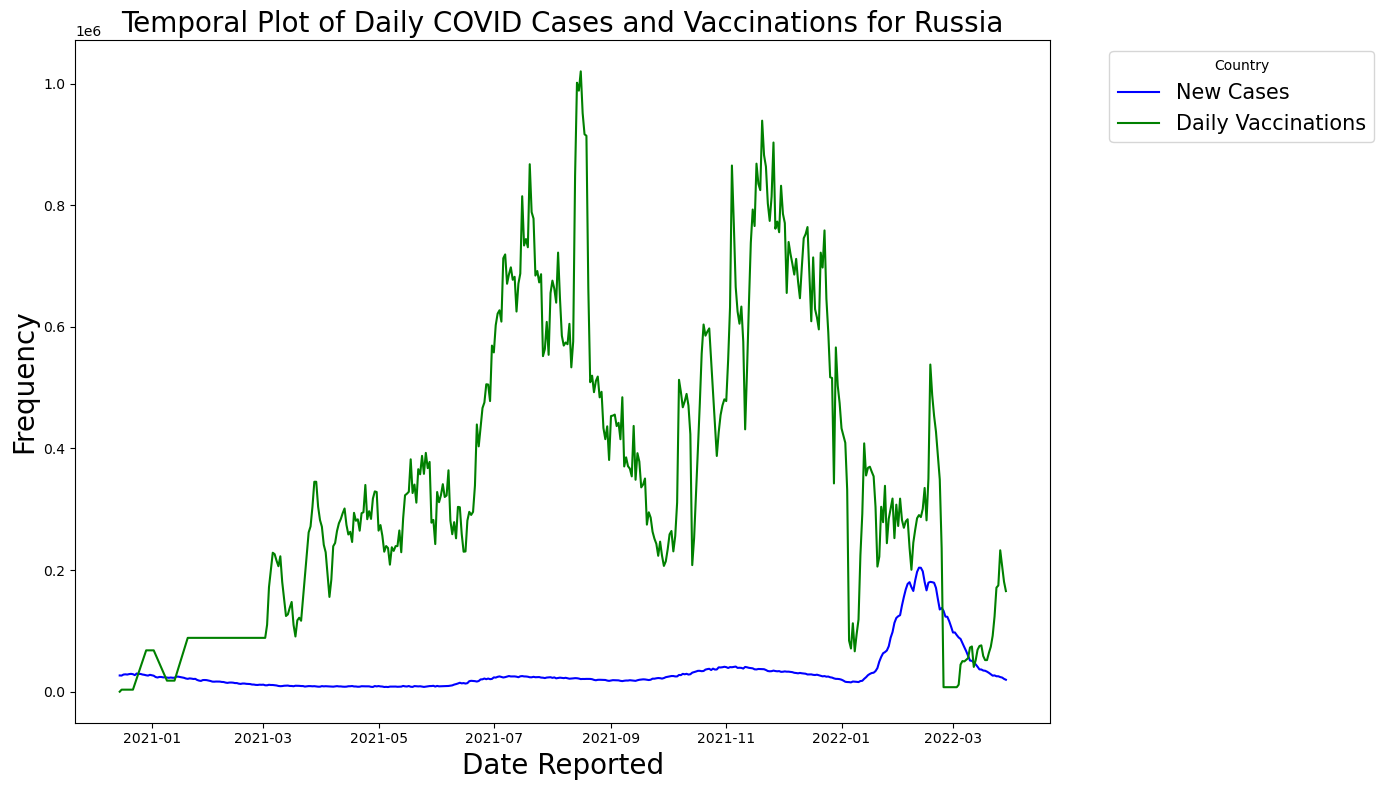

In [114]:
Russia_data = generateCountryData("Russian Federation", "Russia")
displayCountryData("Russia", Russia_data[0], Russia_data[1])

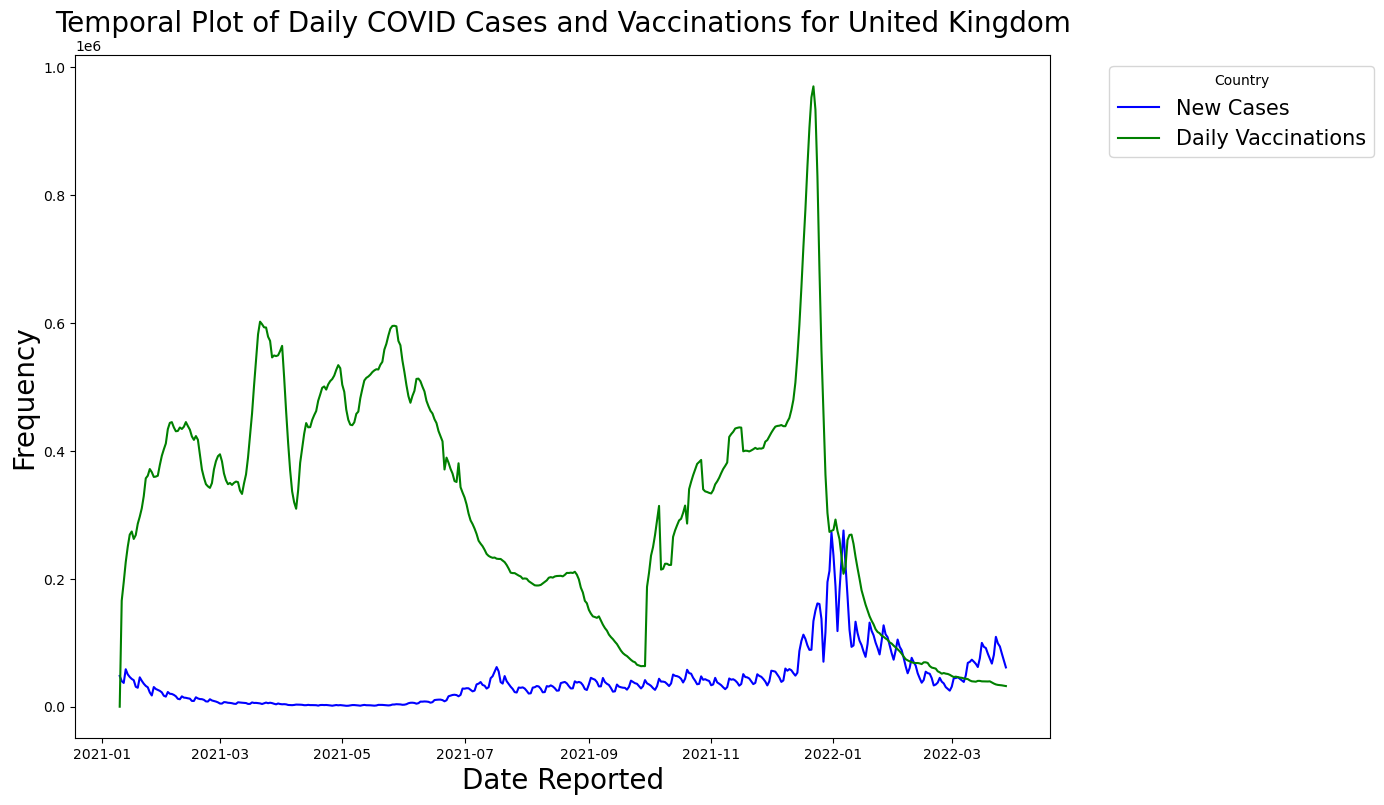

In [115]:
UK_data = generateCountryData("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
displayCountryData("United Kingdom", UK_data[0], UK_data[1])

In [116]:
# shift cases forward by gap_size while keeping data the same size
def applyGap(gap_size, cases, vaccinations):
    if gap_size <=0:
        return (cases, vaccinations)
    gap_cases = cases.iloc[gap_size:,:]
    gap_vaccinations = vaccinations.iloc[:-gap_size] 
    return (gap_cases, gap_vaccinations)

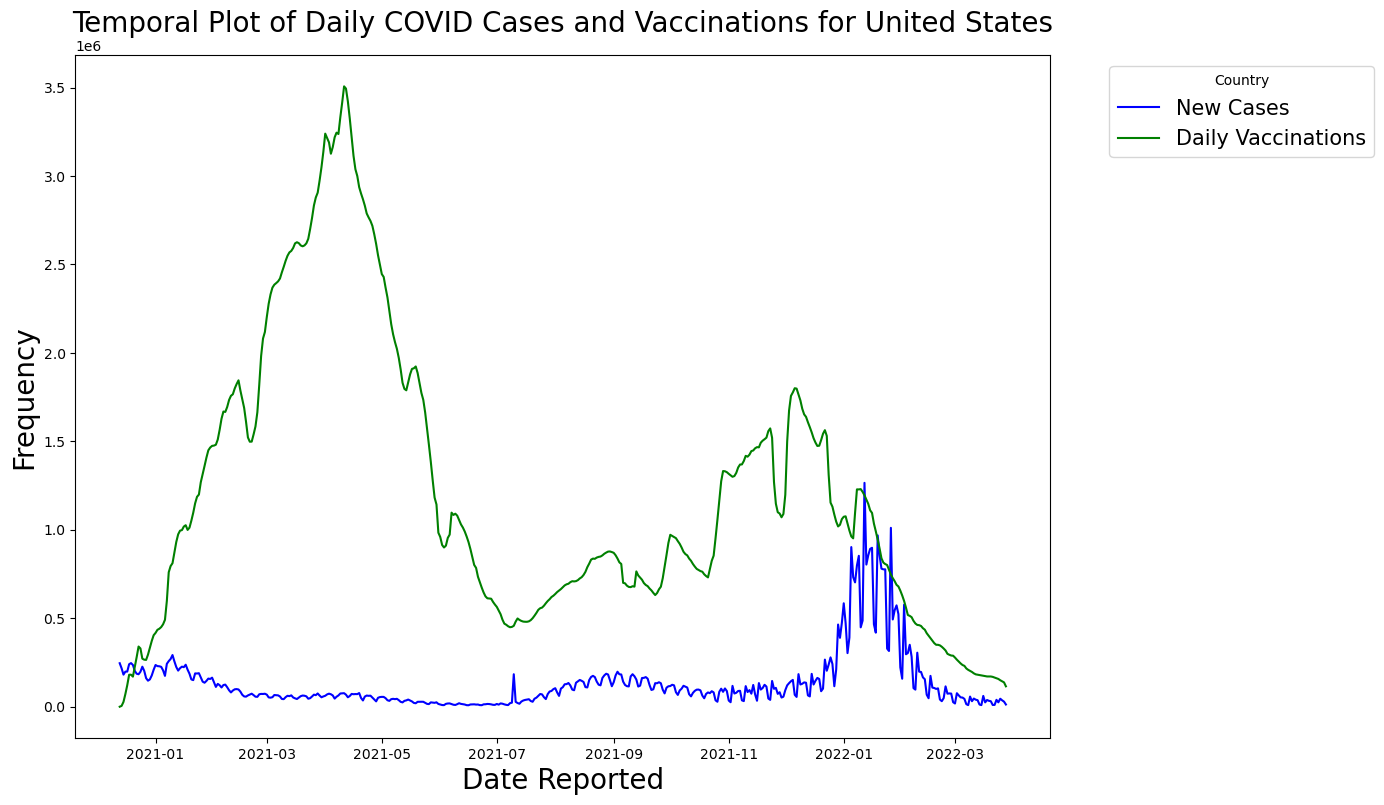

In [117]:
US_data = generateCountryData("United States of America", "United States")
displayCountryData("United States", US_data[0], US_data[1])

In [94]:
cases, vaccinations = applyGap(30, US_data[0], US_data[1])

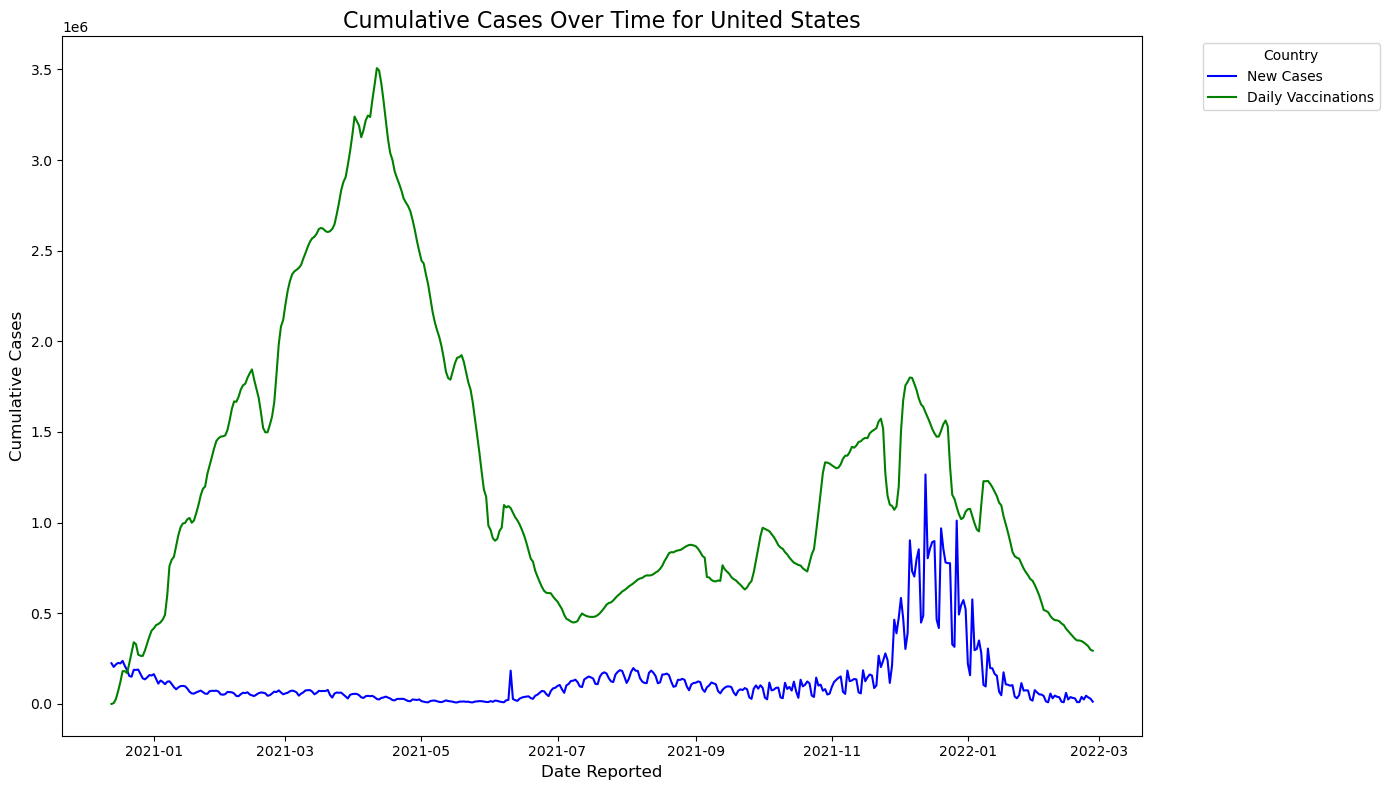

In [95]:
displayCountryData("United States", cases, vaccinations)

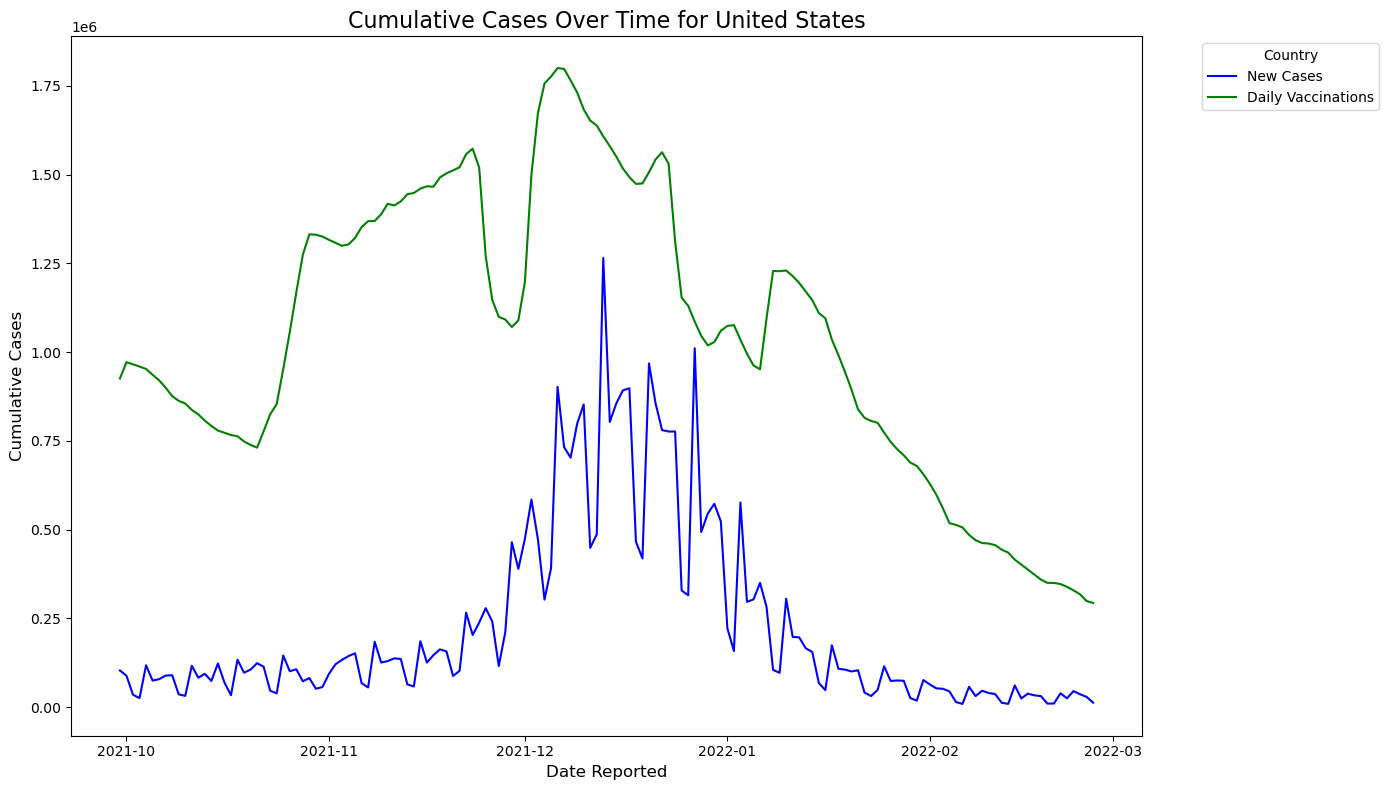

In [96]:
displayCountryData("United States", cases.tail(150), vaccinations.tail(150))

Finding best gap

Test Gap of 0


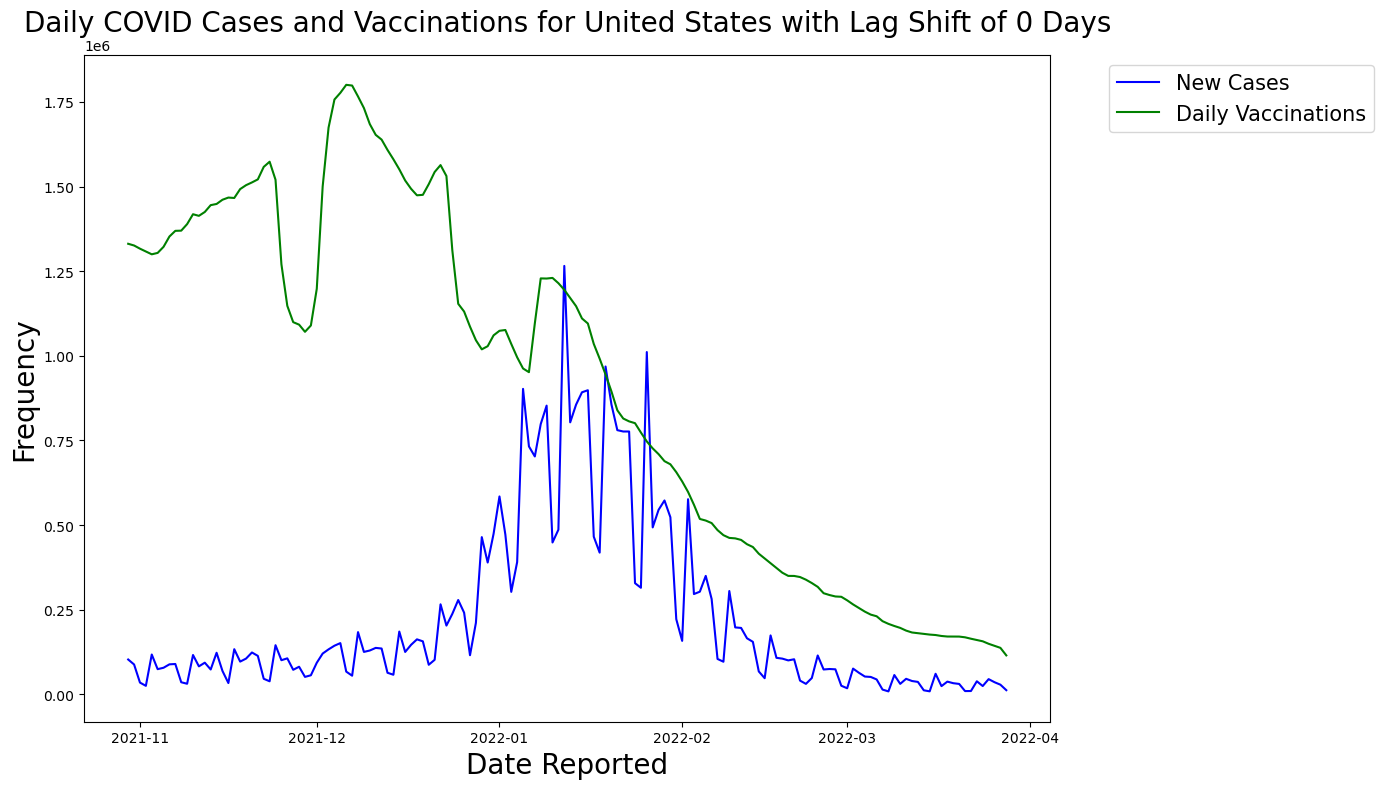

PearsonRResult(statistic=0.13198691086585143, pvalue=0.10739088837875478)
SpearmanrResult(correlation=0.3174843326370061, pvalue=7.53391647308183e-05)
Test Gap of 1


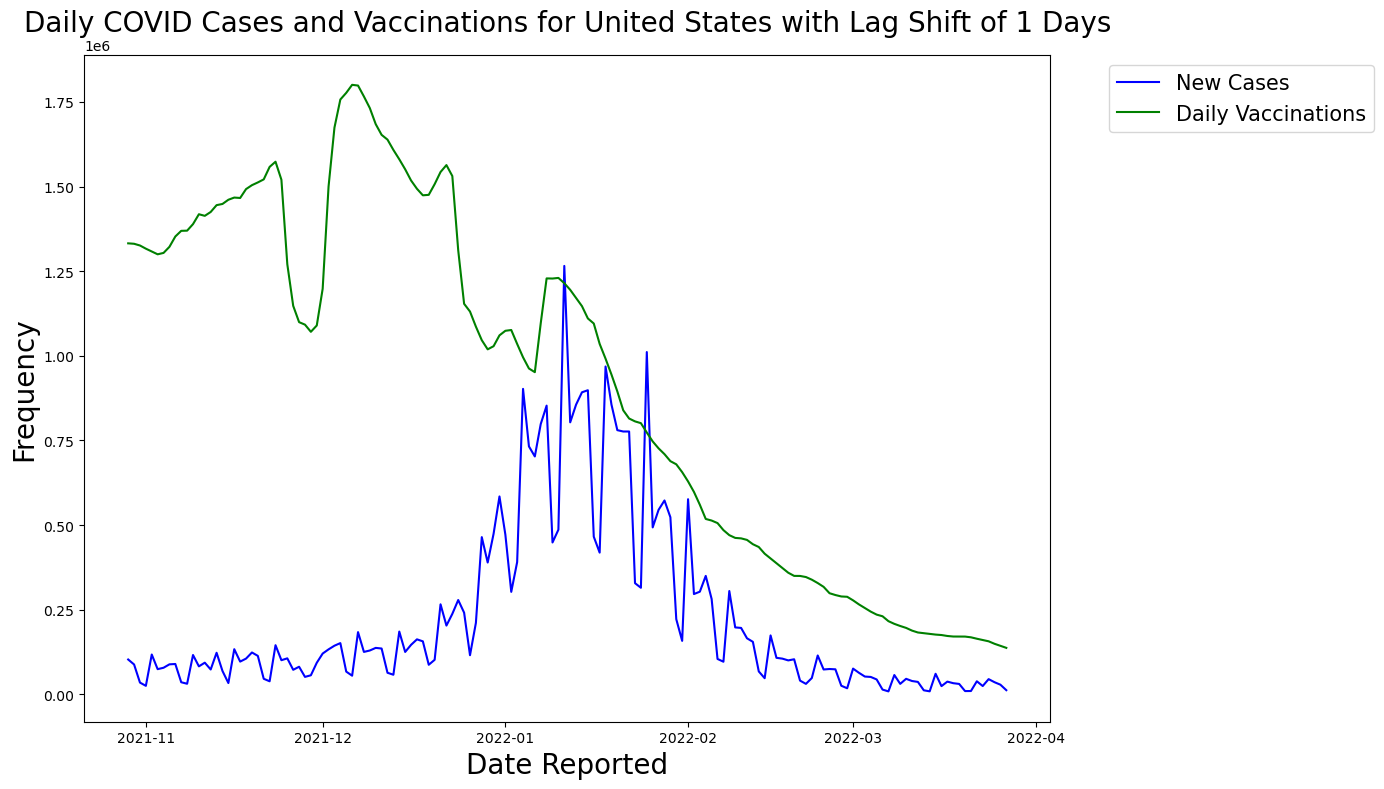

PearsonRResult(statistic=0.13967132897056742, pvalue=0.08825533095036253)
SpearmanrResult(correlation=0.3220178674607761, pvalue=5.8575213143688436e-05)
Test Gap of 5


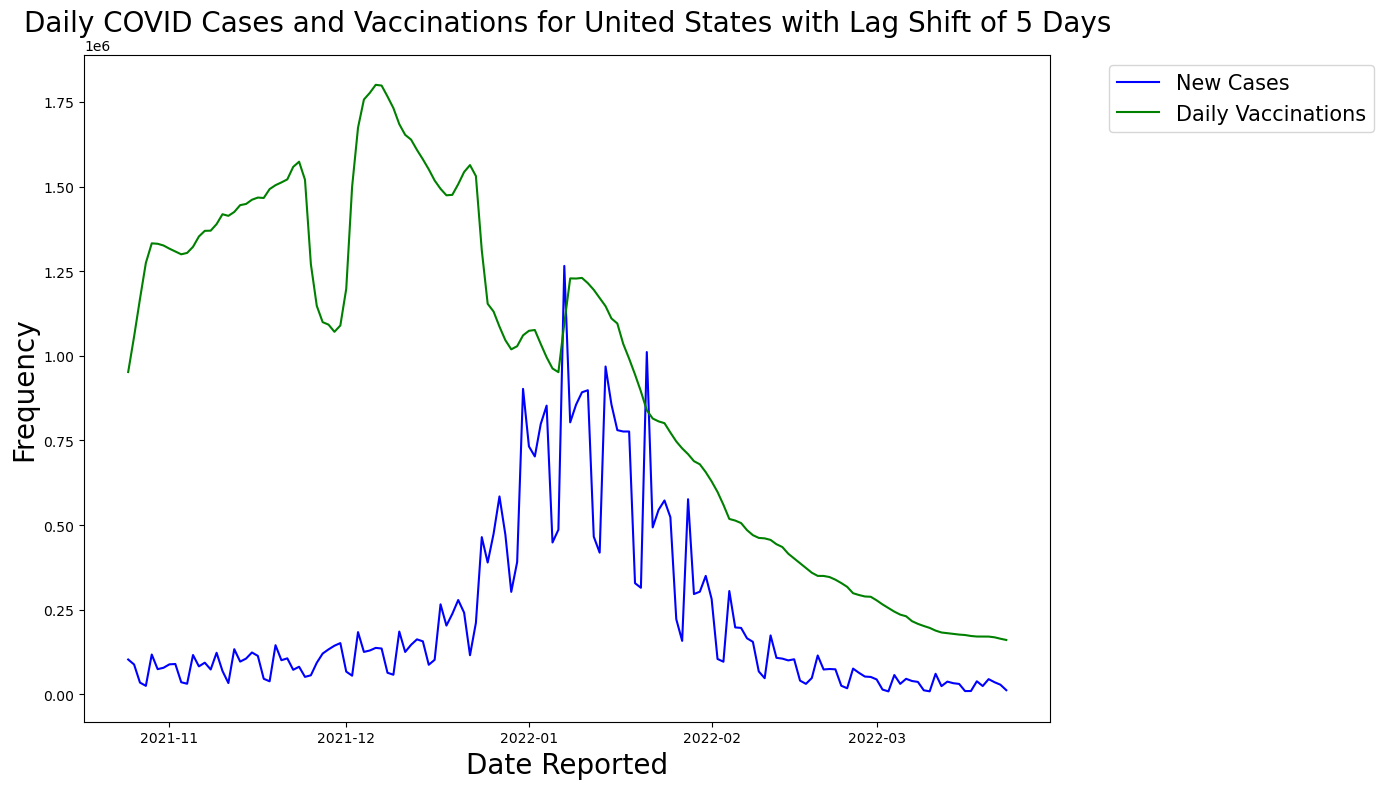

PearsonRResult(statistic=0.1792098532473608, pvalue=0.028213961407540514)
SpearmanrResult(correlation=0.34245610916040714, pvalue=1.790266823441732e-05)
Test Gap of 10


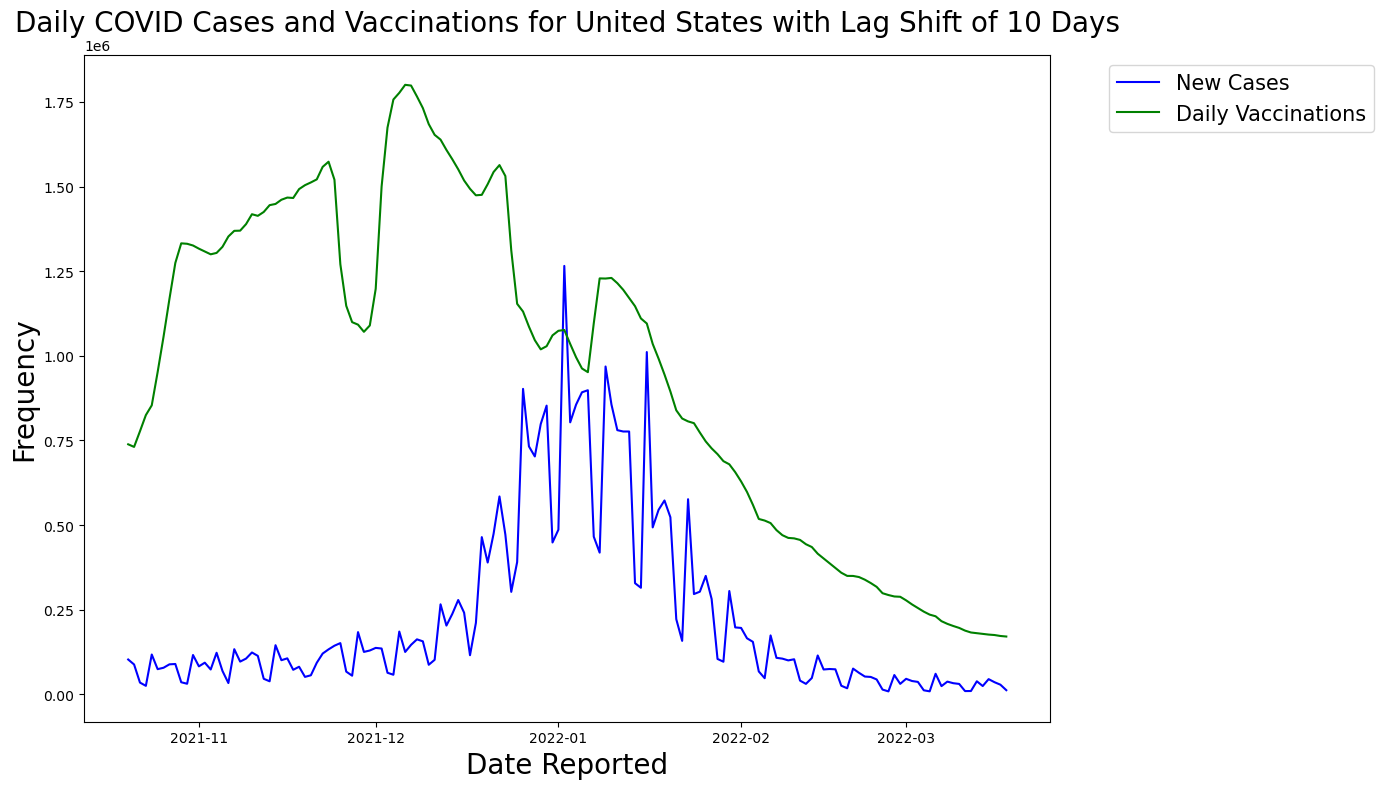

PearsonRResult(statistic=0.24507358307448018, pvalue=0.002505714443686476)
SpearmanrResult(correlation=0.4334574869994222, pvalue=3.0135652616903665e-08)
Test Gap of 14


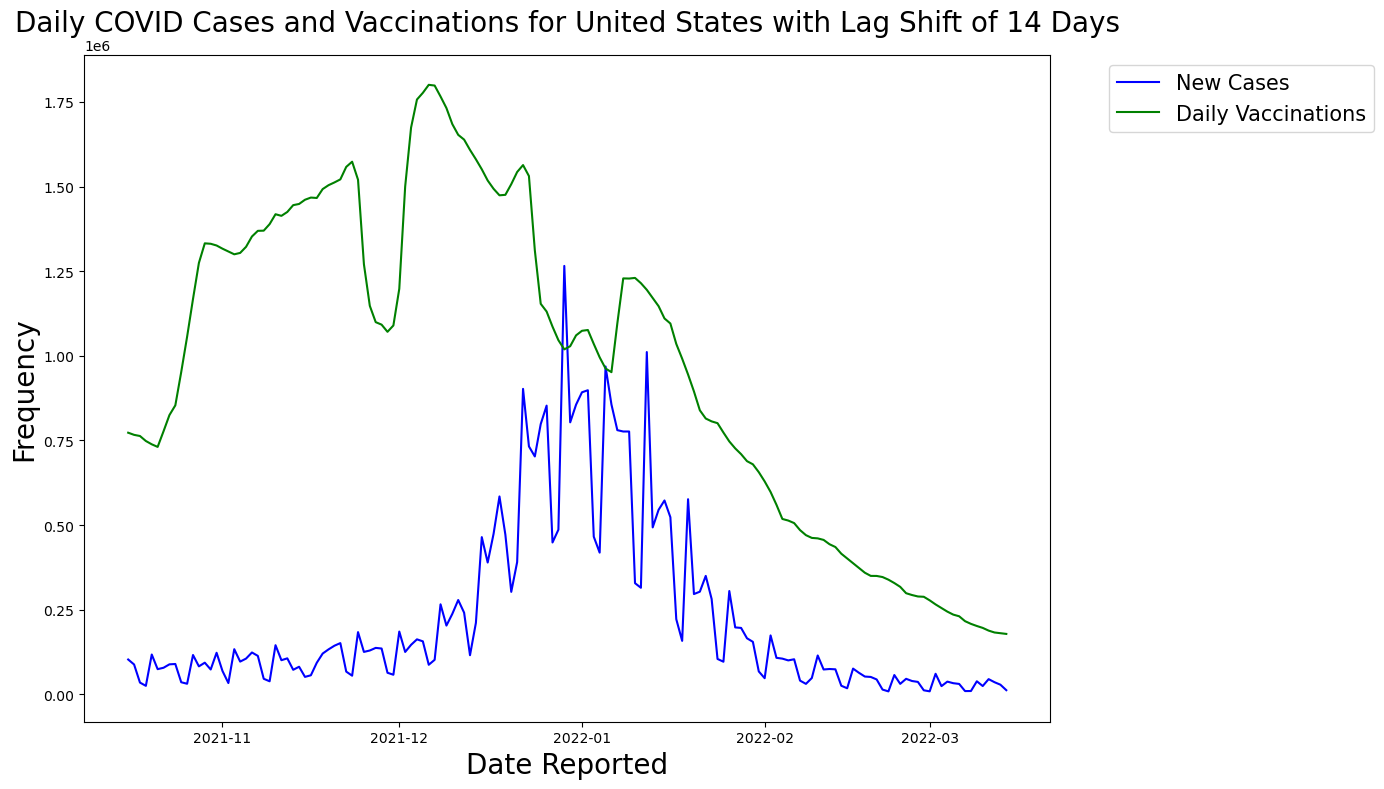

PearsonRResult(statistic=0.3111317653583789, pvalue=0.00010648124477480193)
SpearmanrResult(correlation=0.5252517889683986, pvalue=5.175742576579899e-12)
Test Gap of 21


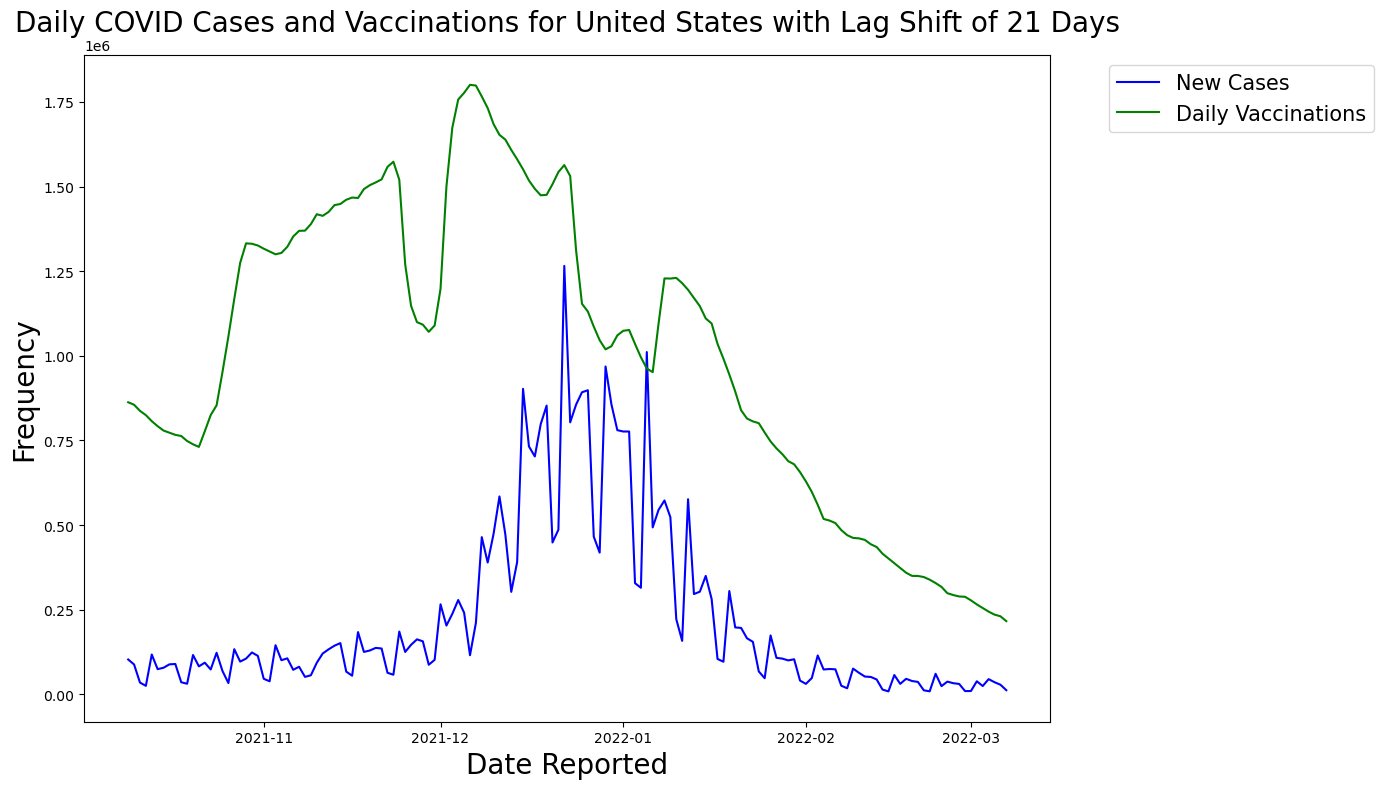

PearsonRResult(statistic=0.44241072228726047, pvalue=1.4418292163927748e-08)
SpearmanrResult(correlation=0.6522049868883062, pvalue=1.5578372194292032e-19)
Test Gap of 30


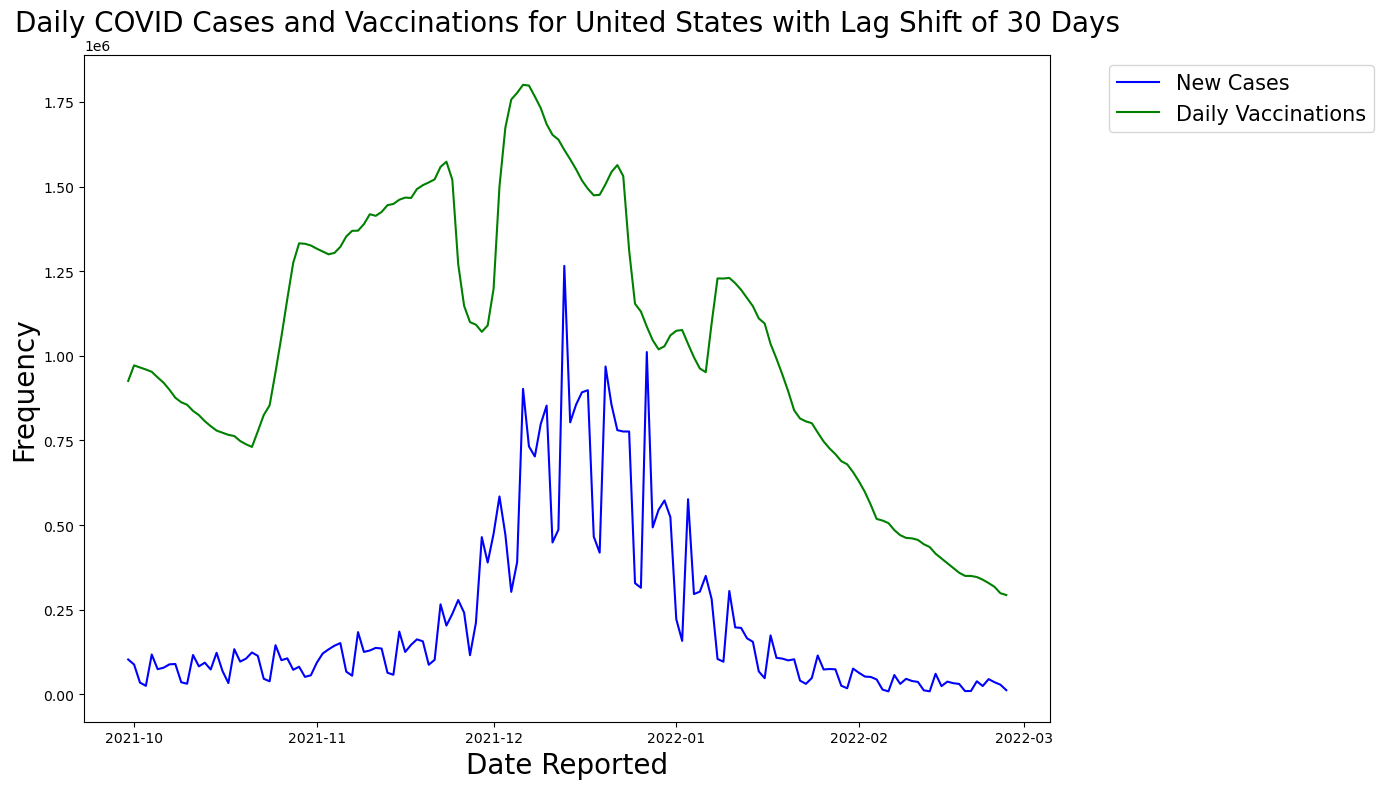

PearsonRResult(statistic=0.6066448315774704, pvalue=1.907449157563409e-16)
SpearmanrResult(correlation=0.7462998355482466, pvalue=5.98985189914388e-28)
Test Gap of 45


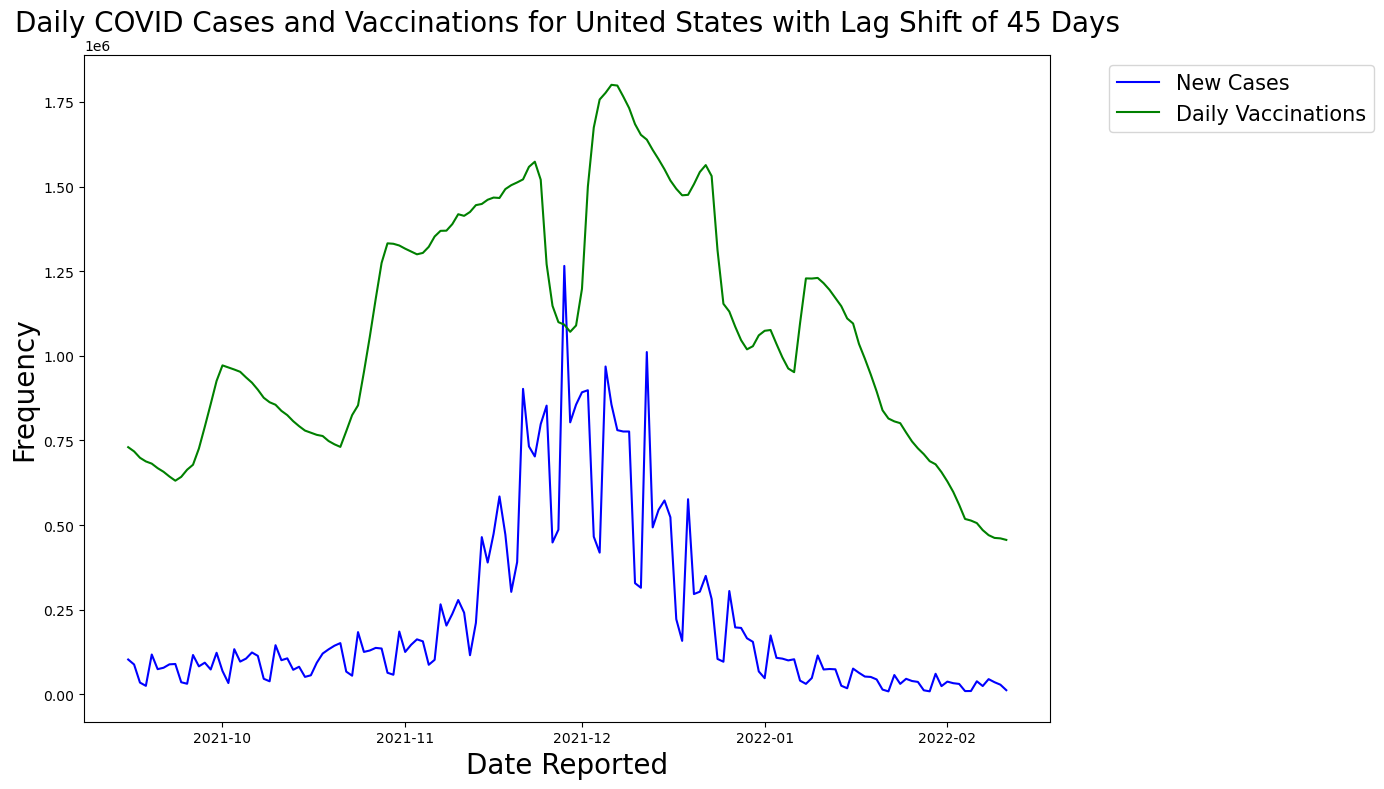

PearsonRResult(statistic=0.6550836499072551, pvalue=9.53902576415641e-20)
SpearmanrResult(correlation=0.7540477354549091, pvalue=8.28956963714483e-29)
Test Gap of 60


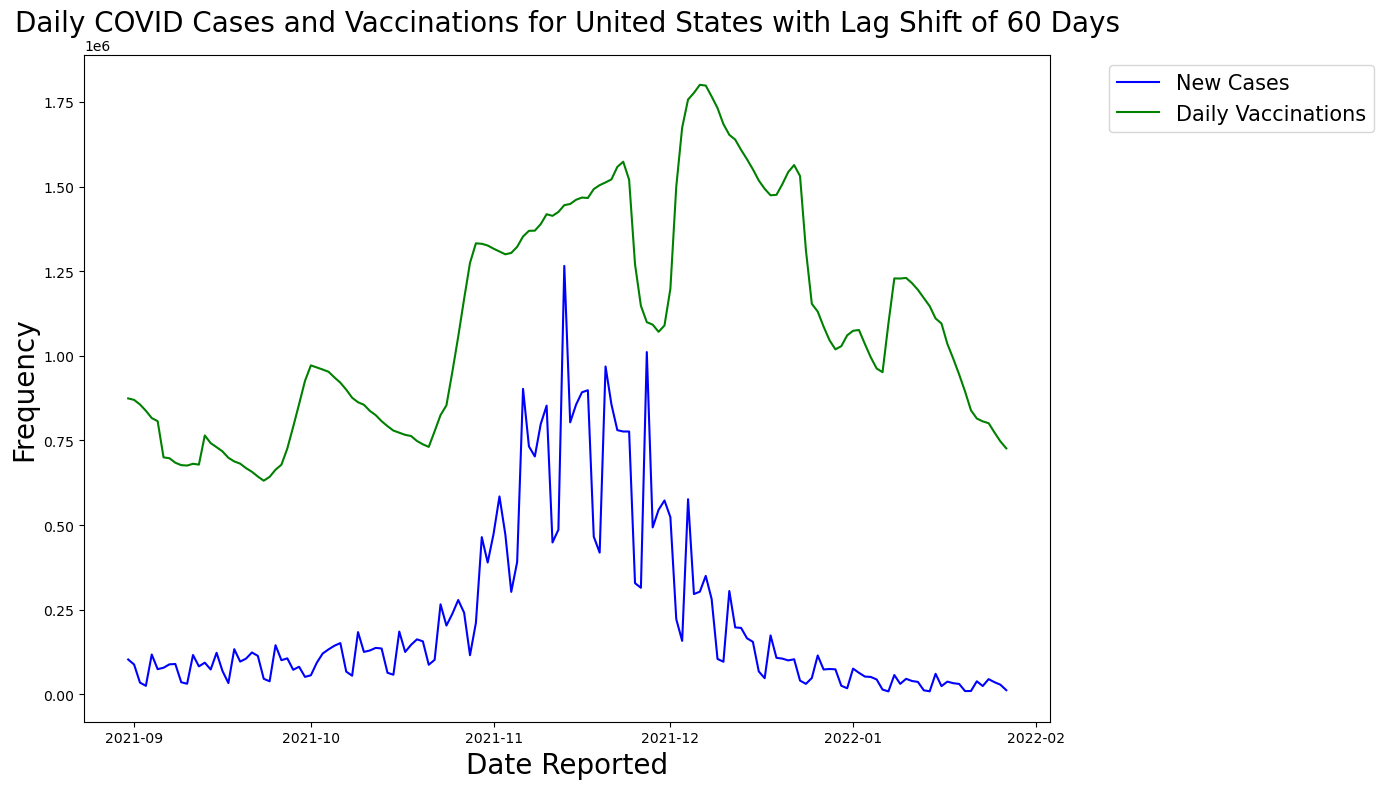

PearsonRResult(statistic=0.5011441618891549, pvalue=6.505470009322498e-11)
SpearmanrResult(correlation=0.4586034934885996, pvalue=3.596396140174594e-09)


In [131]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

gaps = [0, 1, 5, 10, 14, 21, 30, 45, 60]

for gap in gaps:
    US_data = generateCountryData("United States of America", "United States")
    cases, vaccinations = applyGap(gap, US_data[0], US_data[1])
    cases = cases.tail(150)
    vaccinations = vaccinations.tail(150)
    print("Test Gap of " + str(gap))
    displayCountryData("United States", cases, vaccinations, True, gap)
    print(pearsonr(cases["New_cases"], vaccinations["daily_vaccinations"]))
    print(spearmanr(cases["New_cases"], vaccinations["daily_vaccinations"]))

Test Gap of 0


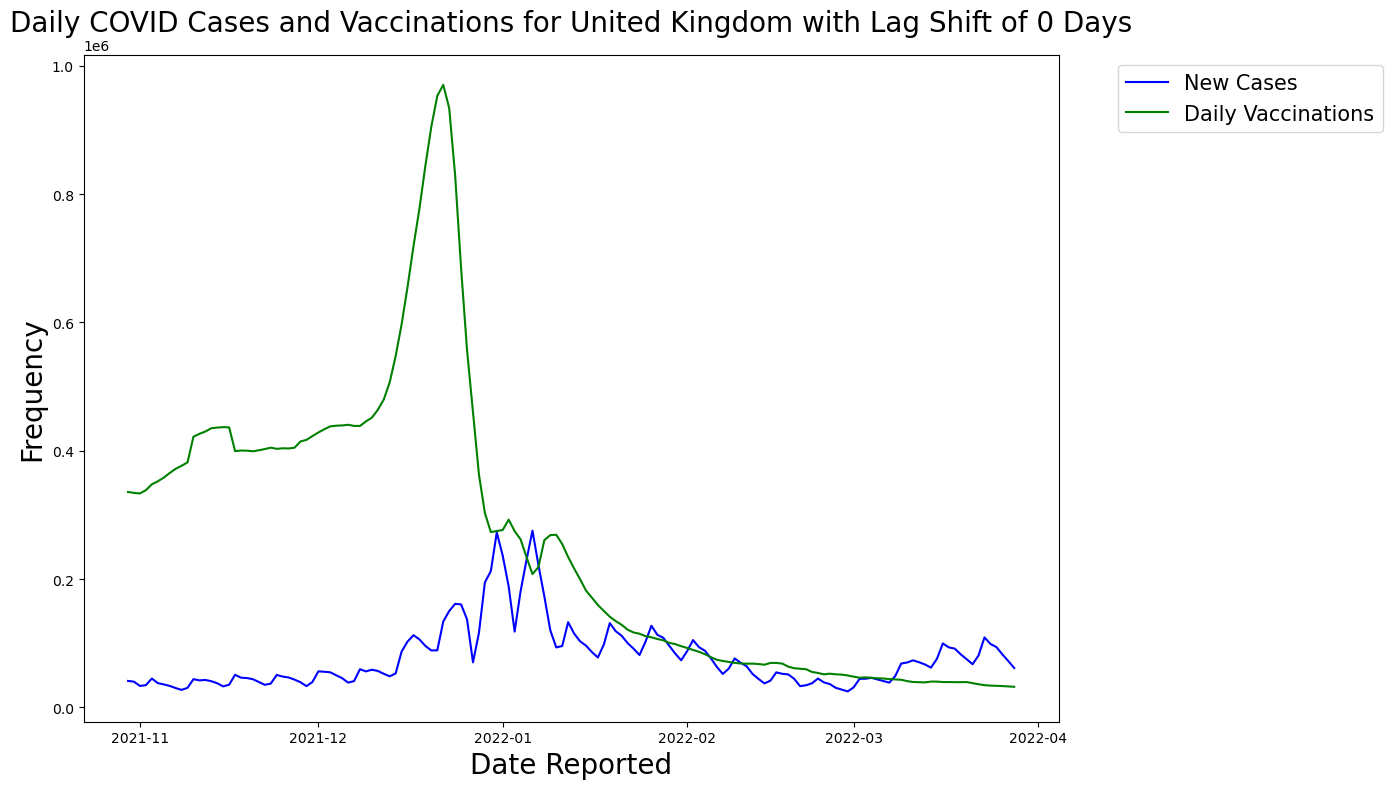

PearsonRResult(statistic=0.09281567111979856, pvalue=0.2586084923182526)
SpearmanrResult(correlation=-0.0006382511562748922, pvalue=0.9938152147498133)
Test Gap of 1


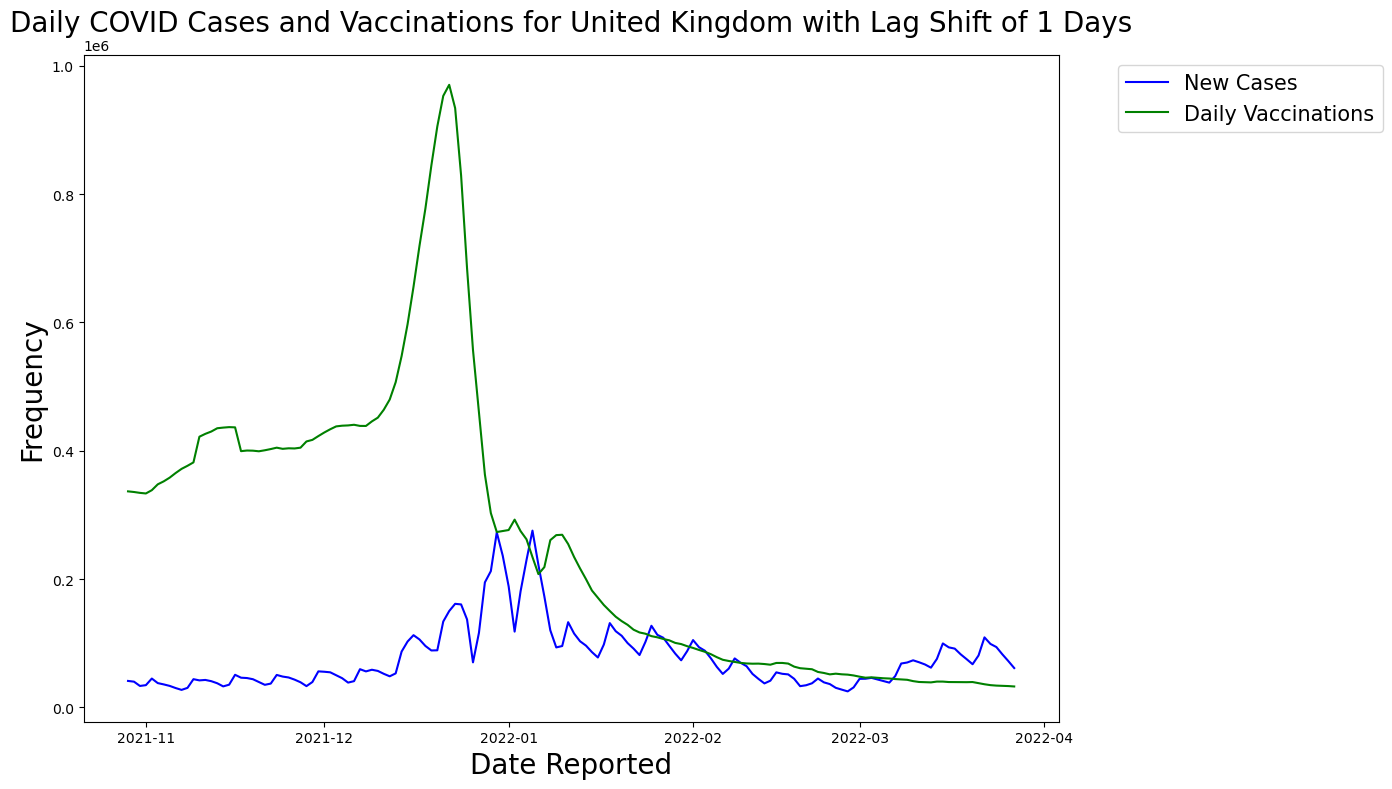

PearsonRResult(statistic=0.1233826600250461, pvalue=0.13252081011322328)
SpearmanrResult(correlation=0.01785147593358271, pvalue=0.8283460296172866)
Test Gap of 5


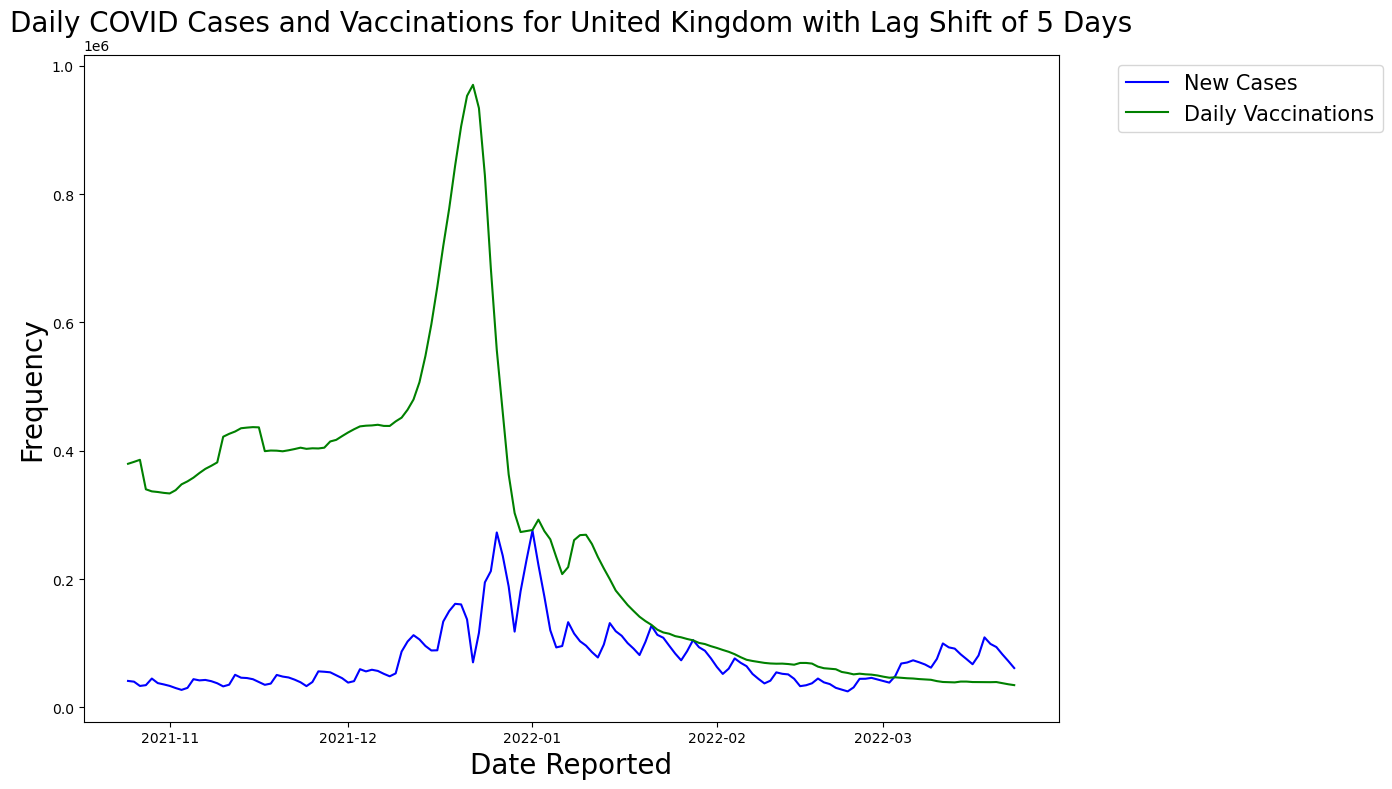

PearsonRResult(statistic=0.26352556793624315, pvalue=0.00112078691849565)
SpearmanrResult(correlation=0.09234196394684653, pvalue=0.26105727785312094)
Test Gap of 10


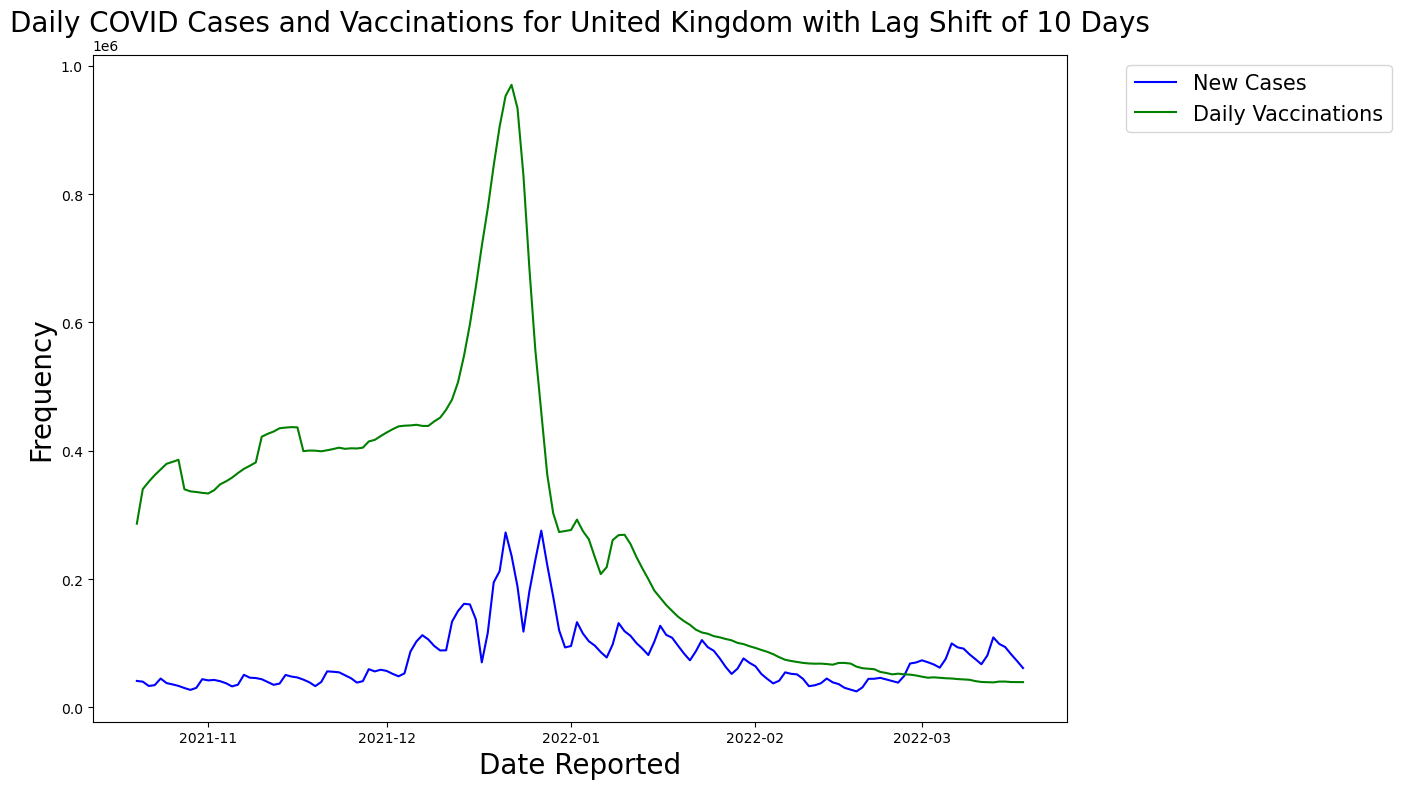

PearsonRResult(statistic=0.47437380001776475, pvalue=8.660730690262932e-10)
SpearmanrResult(correlation=0.1863017790140556, pvalue=0.022450629678304246)
Test Gap of 14


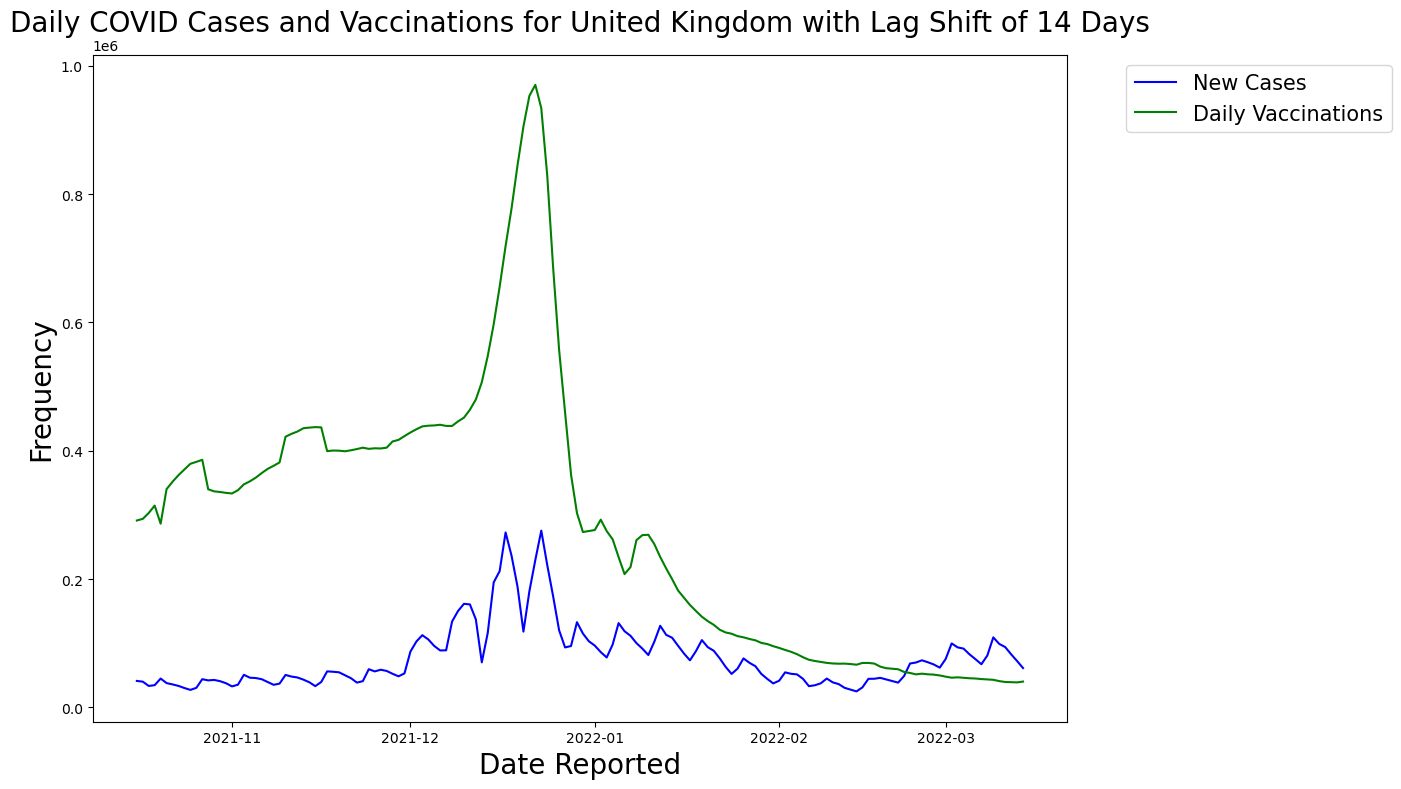

PearsonRResult(statistic=0.5676447341551838, pvalue=3.6028627893484334e-14)
SpearmanrResult(correlation=0.24113605049113296, pvalue=0.0029530015996912574)
Test Gap of 21


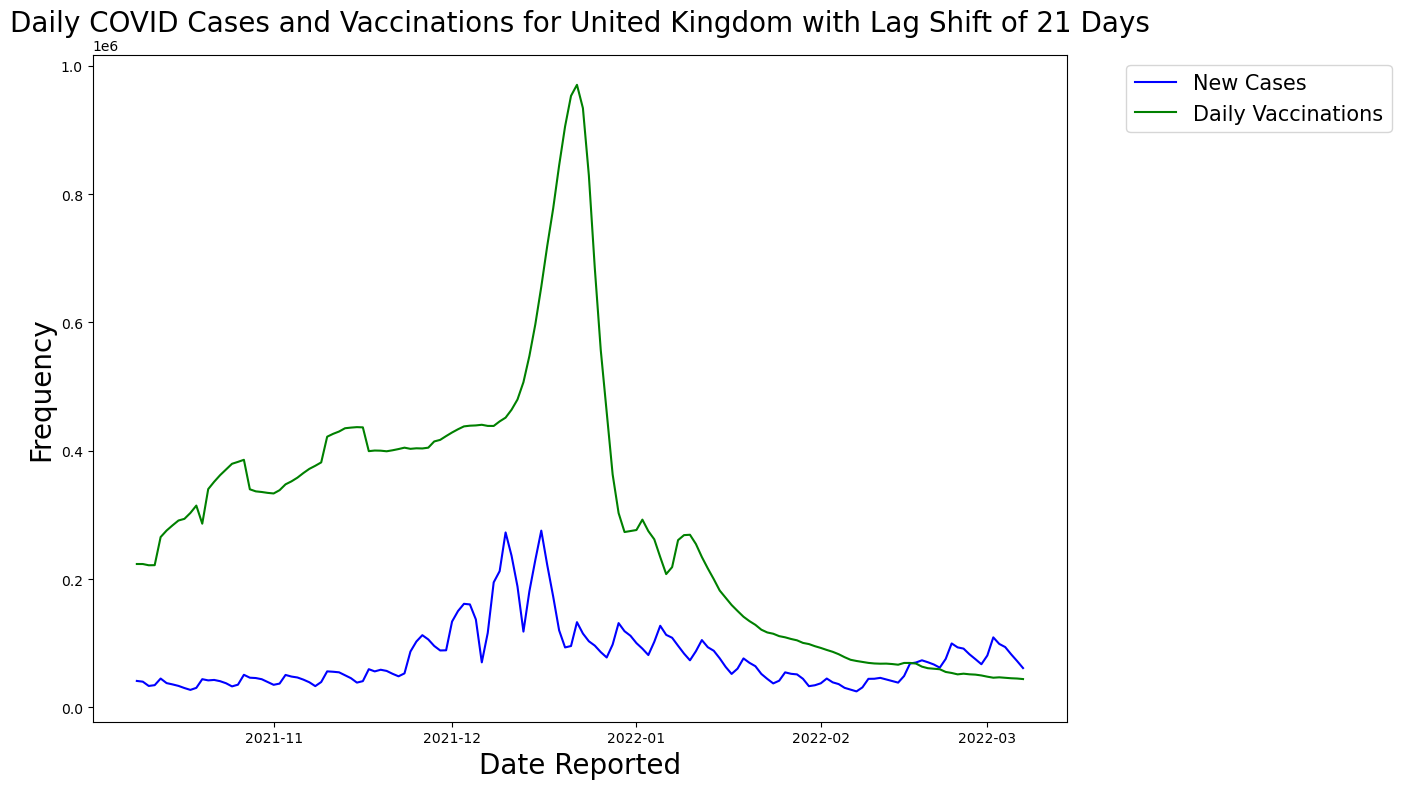

PearsonRResult(statistic=0.44319930632894344, pvalue=1.349797285810178e-08)
SpearmanrResult(correlation=0.3372220987599449, pvalue=2.4447607839704864e-05)
Test Gap of 30


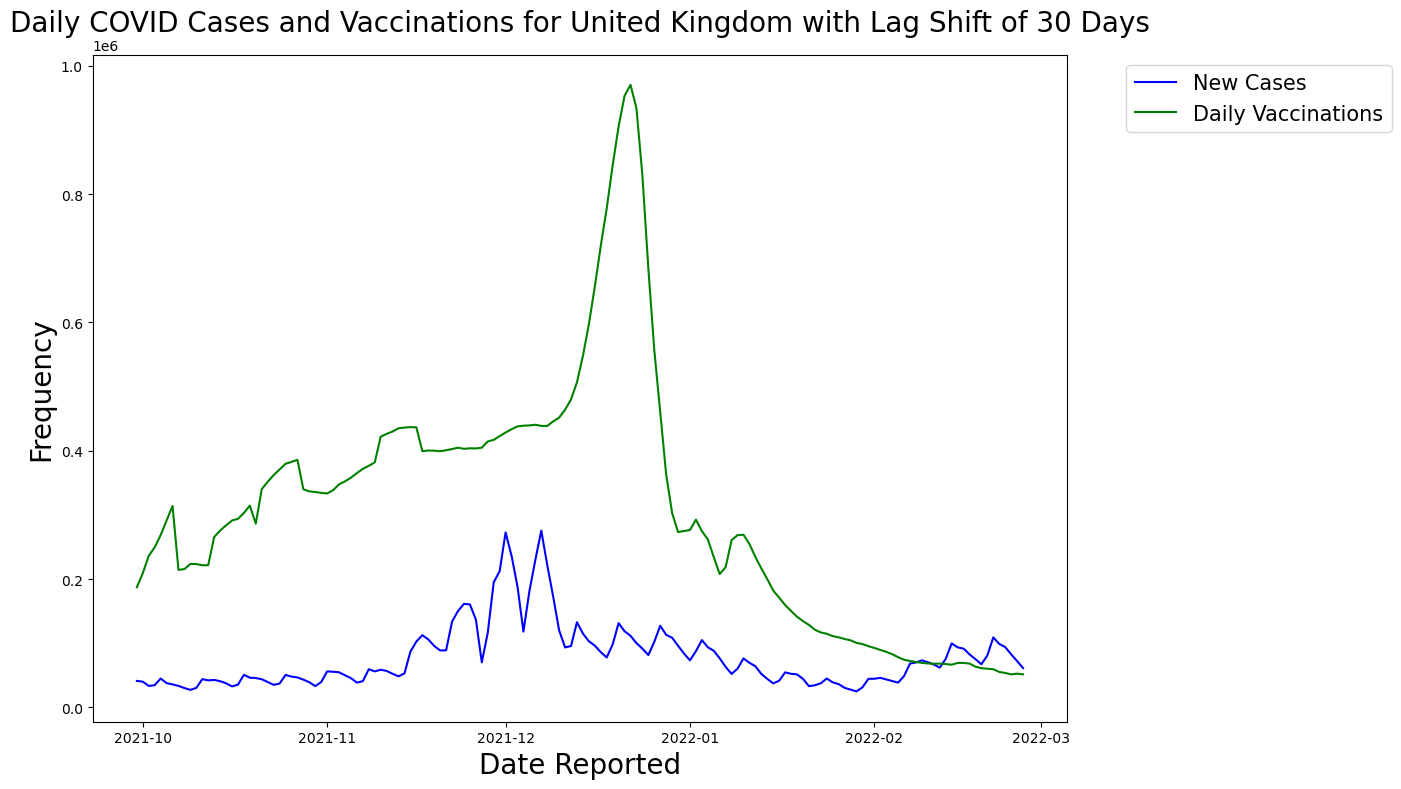

PearsonRResult(statistic=0.3956942743556304, pvalue=5.392422809862025e-07)
SpearmanrResult(correlation=0.4656224721098715, pvalue=1.925497471284333e-09)
Test Gap of 45


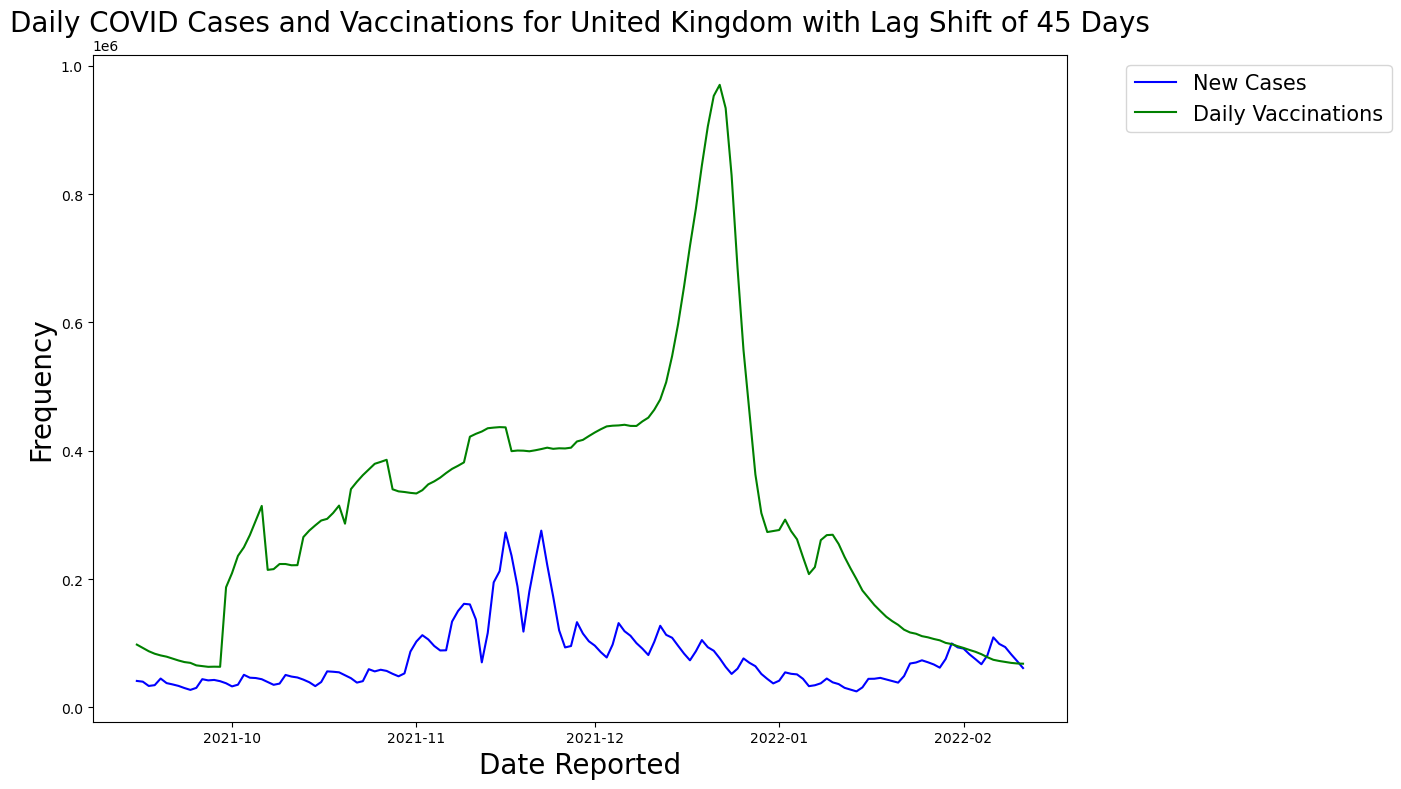

PearsonRResult(statistic=0.3576459728054853, pvalue=7.0182867354372605e-06)
SpearmanrResult(correlation=0.5769945330903596, pvalue=1.0922410761080705e-14)
Test Gap of 60


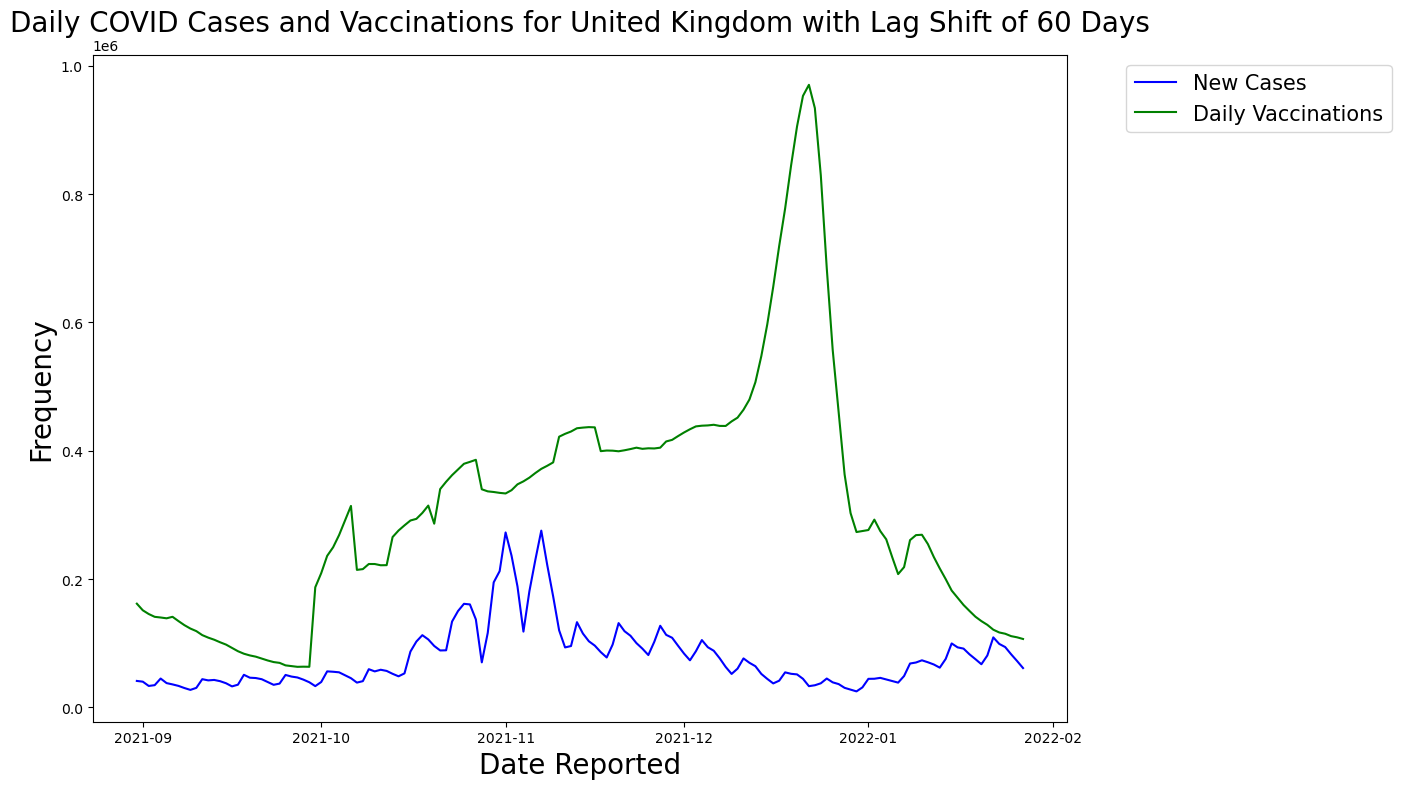

PearsonRResult(statistic=0.14239167304770467, pvalue=0.08217306894228903)
SpearmanrResult(correlation=0.3542930796924308, pvalue=8.665867347952111e-06)


In [133]:
gaps = [0, 1, 5, 10, 14, 21, 30, 45, 60]

for gap in gaps:
    US_data = generateCountryData("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
    cases, vaccinations = applyGap(gap, US_data[0], US_data[1])
    cases = cases.tail(150)
    vaccinations = vaccinations.tail(150)
    print("Test Gap of " + str(gap))
    displayCountryData("United Kingdom", cases, vaccinations, True, gap)
    print(pearsonr(cases["New_cases"], vaccinations["daily_vaccinations"]))
    print(spearmanr(cases["New_cases"], vaccinations["daily_vaccinations"]))

Test Gap of 0


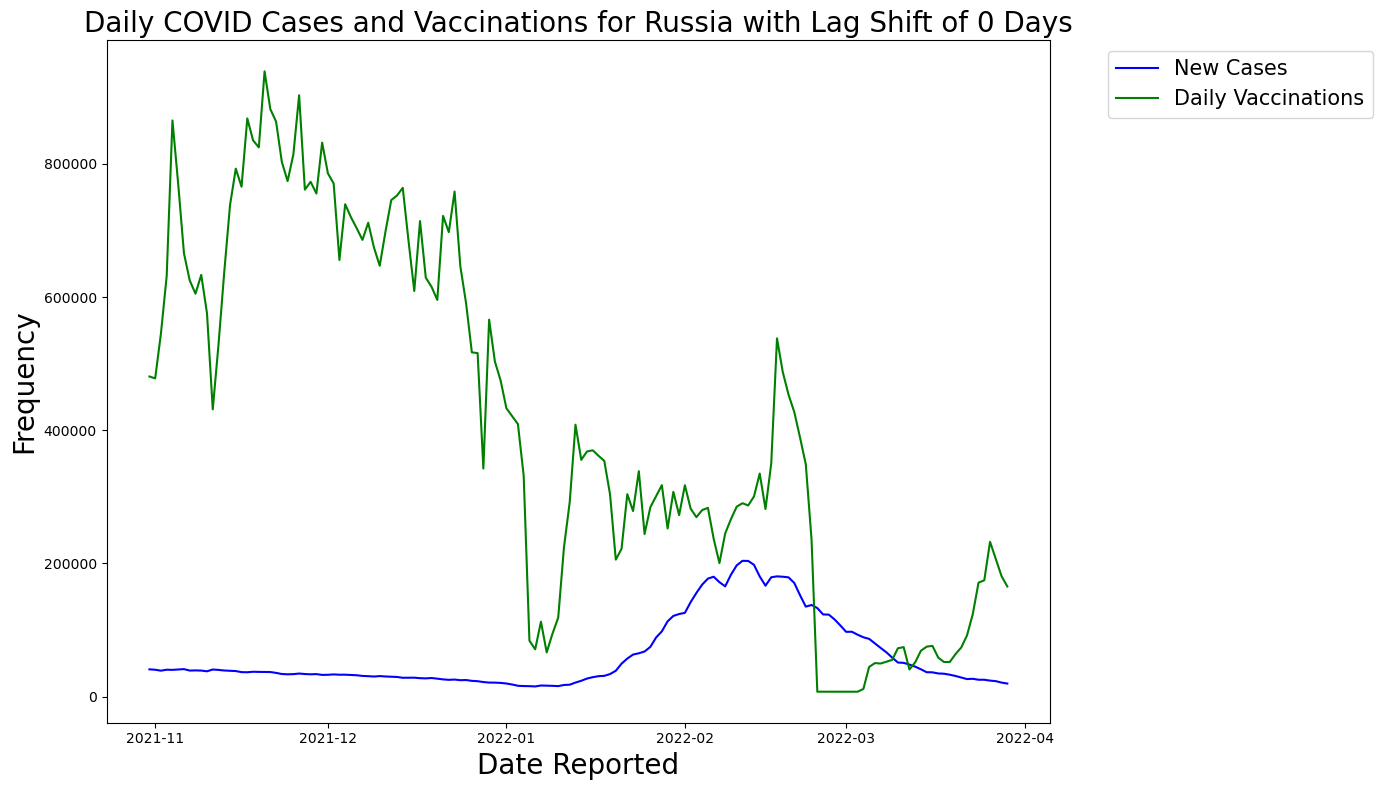

PearsonRResult(statistic=-0.2965641071384907, pvalue=0.0002286821209674484)
SpearmanrResult(correlation=-0.22949065061383694, pvalue=0.004728555809166667)
Test Gap of 1


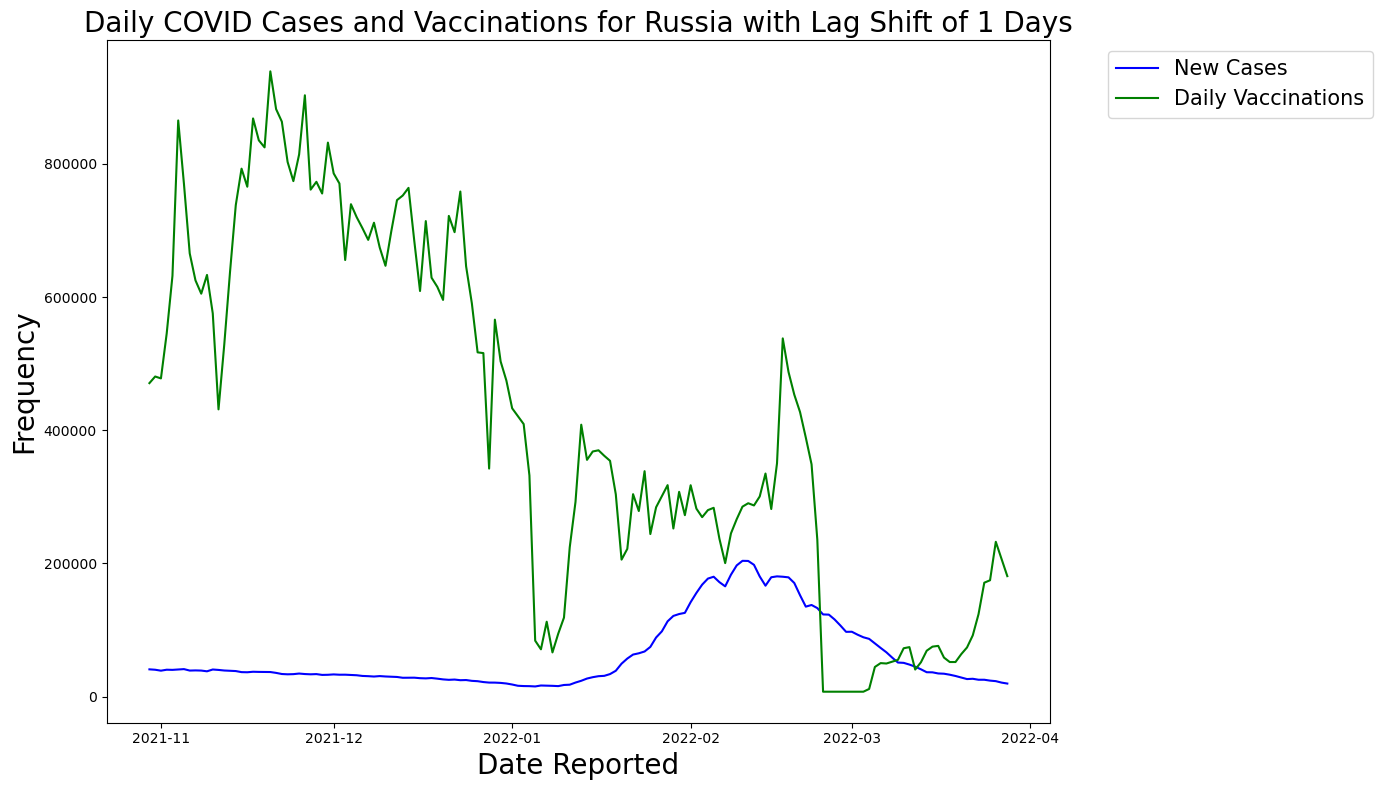

PearsonRResult(statistic=-0.2957890186965563, pvalue=0.00023790883003838492)
SpearmanrResult(correlation=-0.23798944827046647, pvalue=0.003360967011268775)
Test Gap of 5


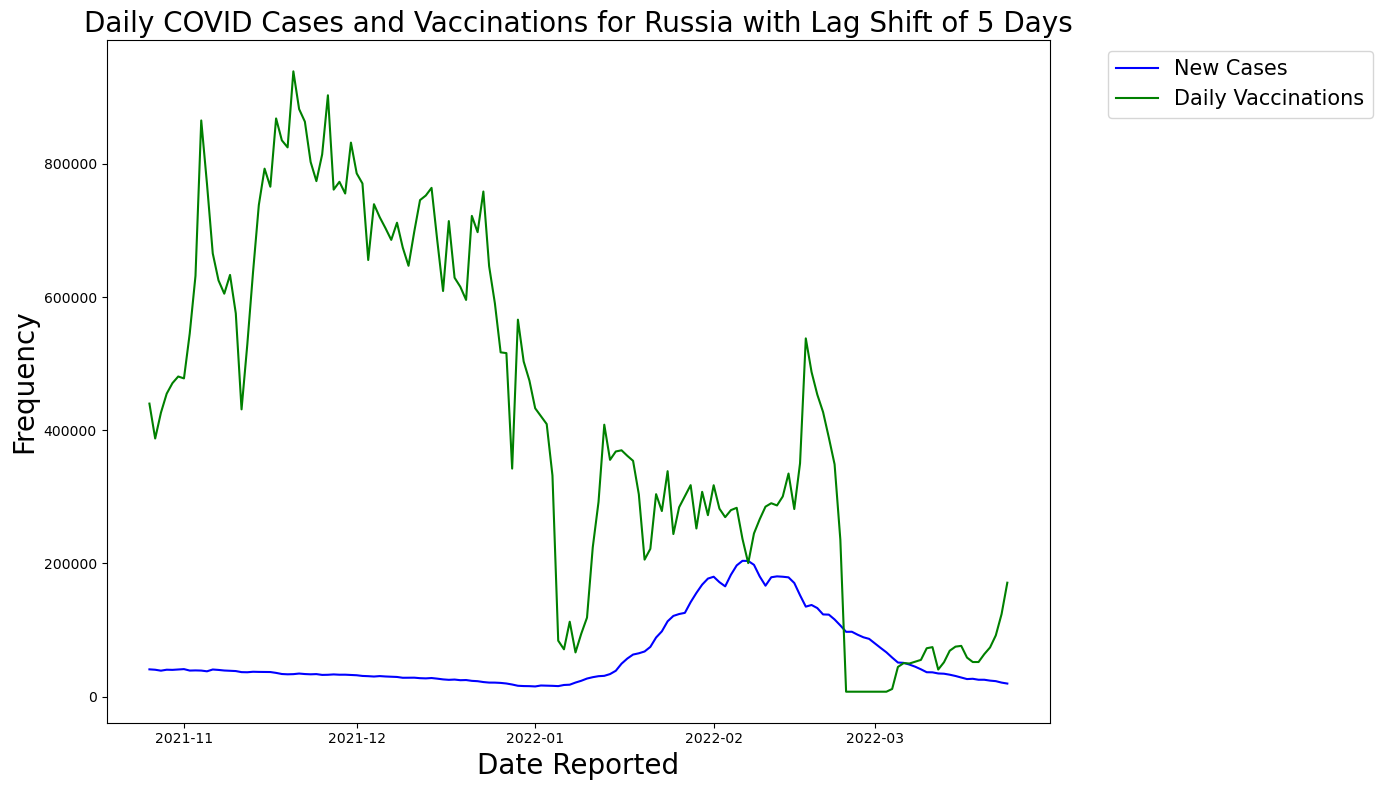

PearsonRResult(statistic=-0.29925094586150247, pvalue=0.0001992087064144896)
SpearmanrResult(correlation=-0.28467593966539906, pvalue=0.0004144149139204346)
Test Gap of 10


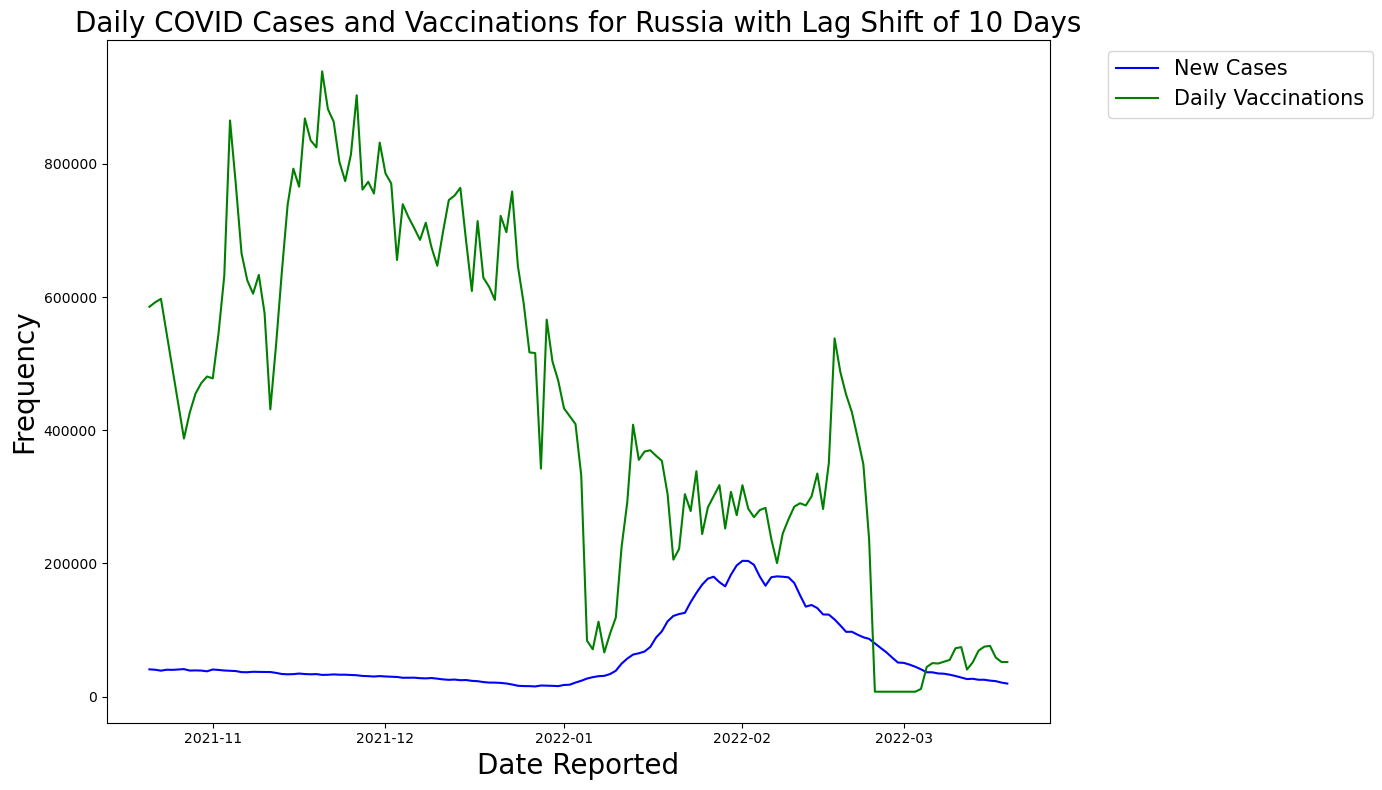

PearsonRResult(statistic=-0.328109461455473, pvalue=4.150302927781411e-05)
SpearmanrResult(correlation=-0.37845963840896313, pvalue=1.795020782506932e-06)
Test Gap of 14


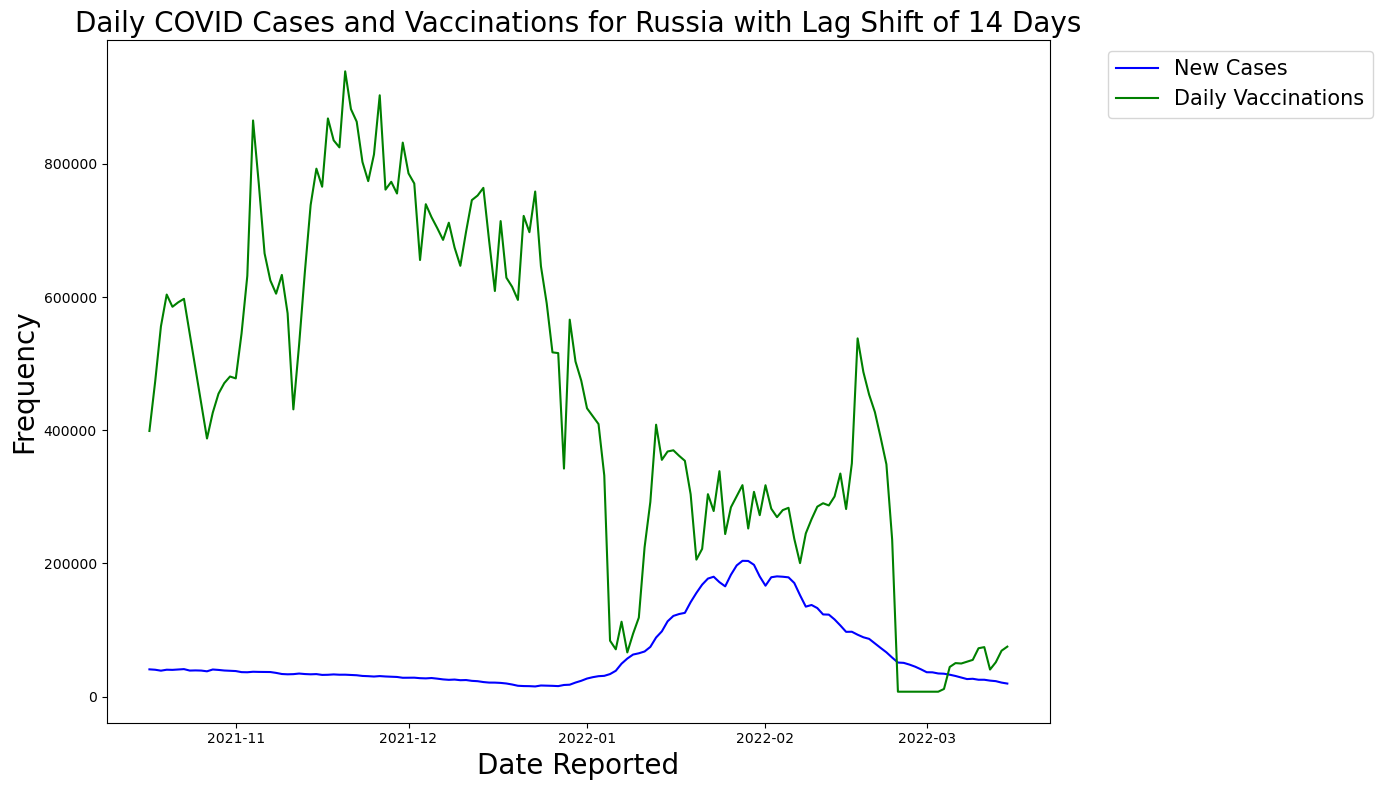

PearsonRResult(statistic=-0.36555696478687383, pvalue=4.226729173859346e-06)
SpearmanrResult(correlation=-0.46221013314073645, pvalue=2.6134569699808695e-09)
Test Gap of 21


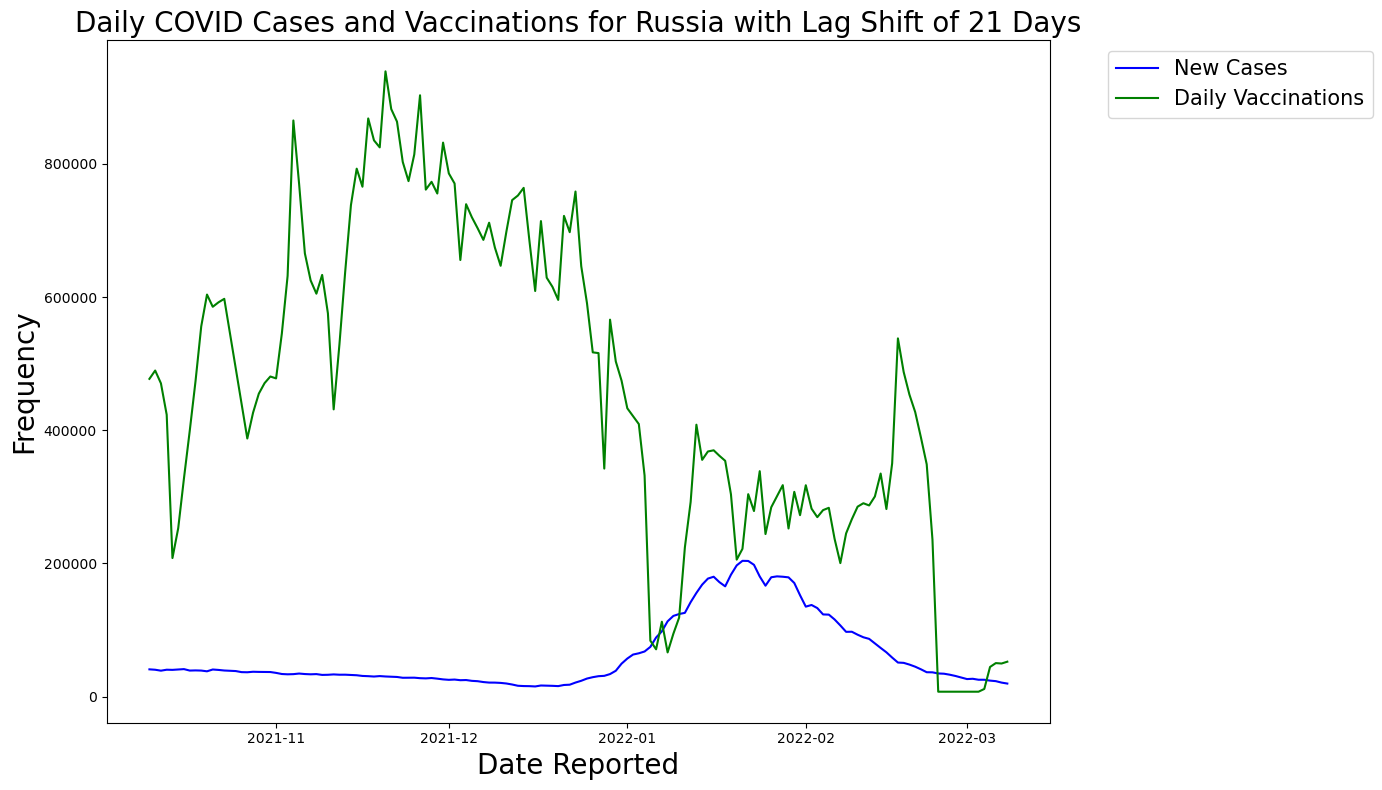

PearsonRResult(statistic=-0.4493325533802907, pvalue=8.034823564954504e-09)
SpearmanrResult(correlation=-0.5573059893467677, pvalue=1.291565925214799e-13)
Test Gap of 30


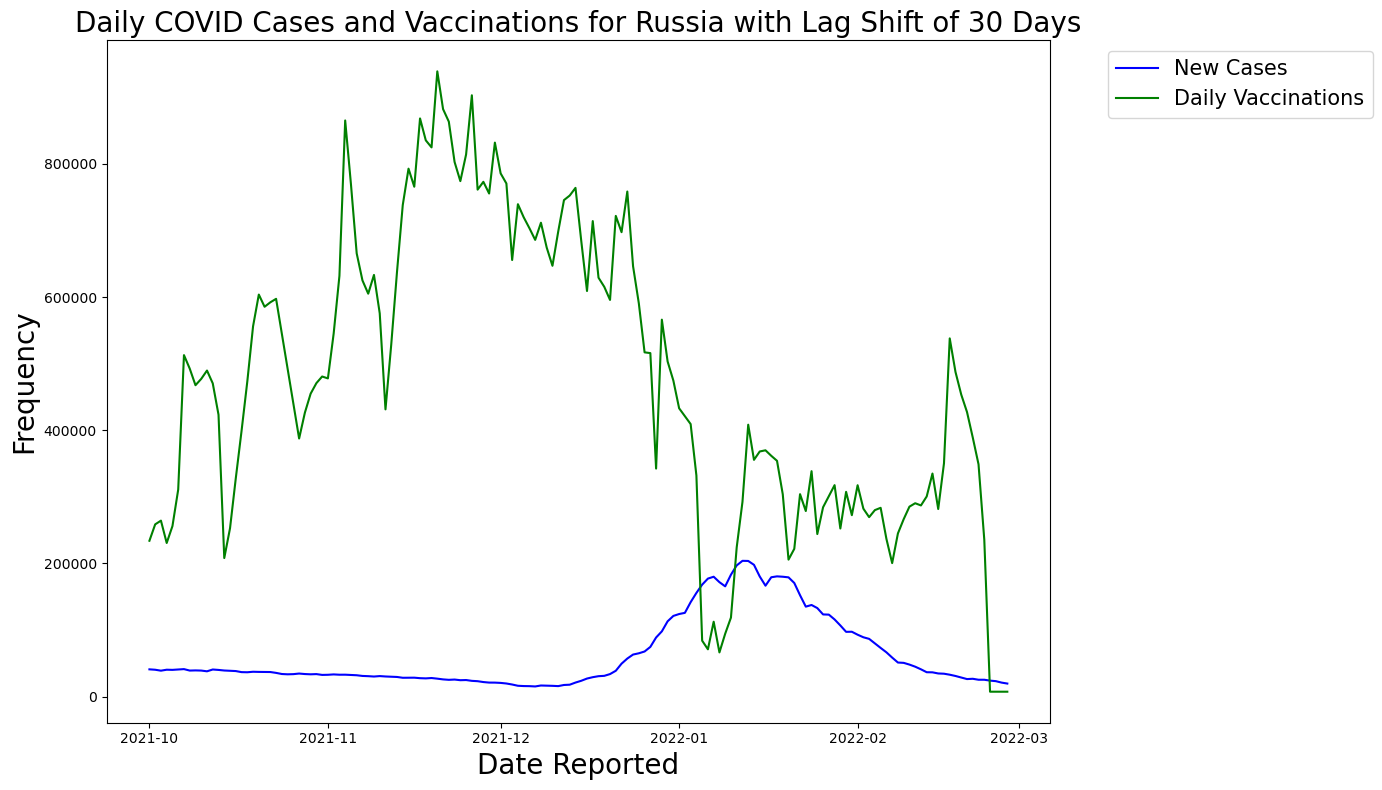

PearsonRResult(statistic=-0.5242936862733856, pvalue=5.745514627113814e-12)
SpearmanrResult(correlation=-0.6322885063303554, pvalue=4.031078192579994e-18)
Test Gap of 45


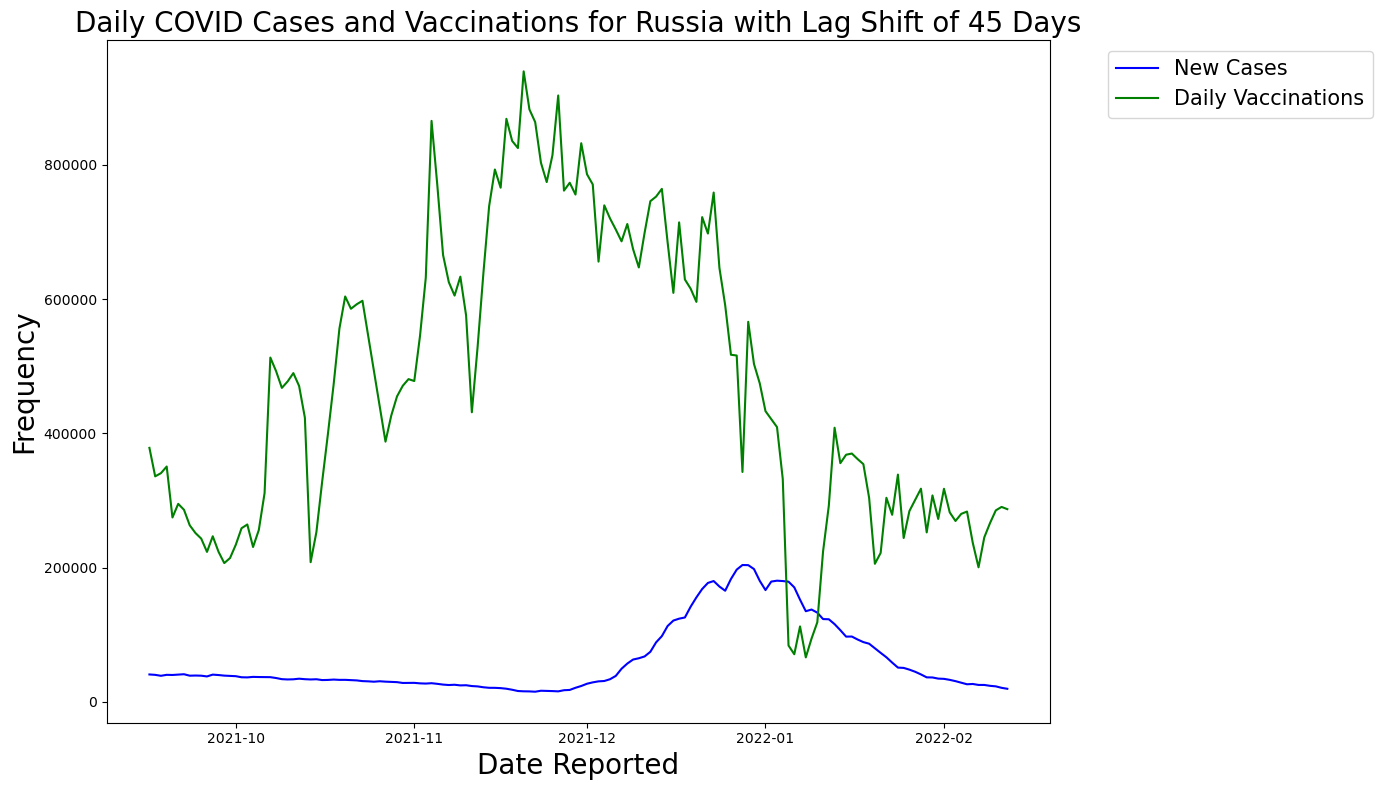

PearsonRResult(statistic=-0.1393854209355666, pvalue=0.08891491174567803)
SpearmanrResult(correlation=-0.33178392976050247, pvalue=3.359483011432009e-05)
Test Gap of 60


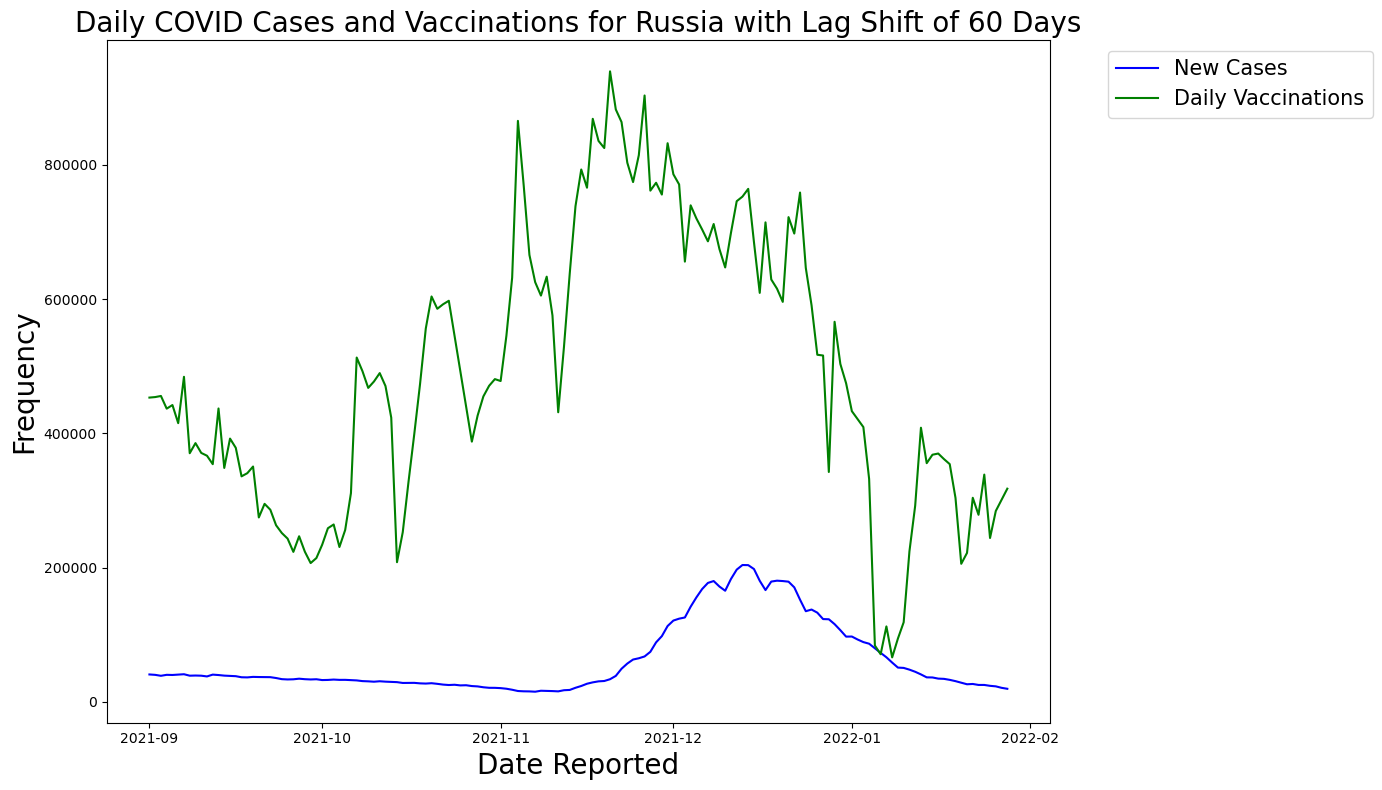

PearsonRResult(statistic=0.4029929059576315, pvalue=3.1734125326017104e-07)
SpearmanrResult(correlation=0.21086822602632982, pvalue=0.009592422199598407)


In [132]:
for gap in gaps:
    US_data = generateCountryData("Russian Federation", "Russia")
    cases, vaccinations = applyGap(gap, US_data[0], US_data[1])
    cases = cases.tail(150)
    vaccinations = vaccinations.tail(150)
    print("Test Gap of " + str(gap))
    displayCountryData("Russia", cases, vaccinations, True, gap)
    print(pearsonr(cases["New_cases"], vaccinations["daily_vaccinations"]))
    print(spearmanr(cases["New_cases"], vaccinations["daily_vaccinations"]))

In [100]:
for 

SyntaxError: invalid syntax (1235331270.py, line 1)